<a href="https://colab.research.google.com/github/AchmadLutfi196/computingintelligence/blob/main/UAS_CI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. SVM dengan Kernel Linear
Diberikan 10 buah data dalam bentuk koordinat dua dimensi (x₁, x₂), yang terbagi ke dalam
dua kelas (misalnya kelas A dan kelas B).
Tugas Anda:
1. Buatlah persamaan hyperplane dengan menggunakan kernel linear yang dapat
memisahkan kedua kelas tersebut.
2. Tentukan nilai vektor bobot (w) dan bias (b) dari hyperplane tersebut.
3. Tampilkan visualisasi data dan garis pemisah (hyperplane) menggunakan Python
(opsional jika ada).
Referensi: https://www.youtube.com/watch?v=48hZq0xhbtM (detik 9.54)

In [10]:
print("DATA 10 TITIK KOORDINAT 2D")
print("="*40)

# Data manual yang mudah dipisahkan
X = [
    # Kelas A (+1) - area kanan atas
    [3.0, 3.0],
    [2.5, 2.8],
    [2.8, 2.5],
    [3.2, 2.9],
    [2.7, 3.1],

    # Kelas B (-1) - area kiri bawah
    [0.5, 0.5],
    [0.8, 0.3],
    [0.3, 0.8],
    [0.7, 0.6],
    [0.4, 0.7]
]

y = [1, 1, 1, 1, 1, -1, -1, -1, -1, -1]

print("Data Training:")
print("No  x1     x2     Label  Kelas")
print("-" * 35)
for i in range(len(X)):
    x1, x2 = X[i]
    label = y[i]
    kelas = "A (+1)" if label == 1 else "B (-1)"
    print(f"{i+1:2}  {x1:.1f}   {x2:.1f}   {label:2}     {kelas}")

# Hitung jumlah kelas
kelas_a = sum(1 for label in y if label == 1)
kelas_b = sum(1 for label in y if label == -1)

print(f"\nTotal: {len(X)} data points")
print(f"Kelas A: {kelas_a} points")
print(f"Kelas B: {kelas_b} points")


DATA 10 TITIK KOORDINAT 2D
Data Training:
No  x1     x2     Label  Kelas
-----------------------------------
 1  3.0   3.0    1     A (+1)
 2  2.5   2.8    1     A (+1)
 3  2.8   2.5    1     A (+1)
 4  3.2   2.9    1     A (+1)
 5  2.7   3.1    1     A (+1)
 6  0.5   0.5   -1     B (-1)
 7  0.8   0.3   -1     B (-1)
 8  0.3   0.8   -1     B (-1)
 9  0.7   0.6   -1     B (-1)
10  0.4   0.7   -1     B (-1)

Total: 10 data points
Kelas A: 5 points
Kelas B: 5 points


In [11]:
import math

print("IMPLEMENTASI SVM SEDERHANA")
print("="*40)

class SimpleSVM:
    def __init__(self):
        self.w = None
        self.b = None

    def dot(self, a, b):
        return sum([a[i] * b[i] for i in range(len(a))])

    def norm(self, v):
        return math.sqrt(self.dot(v, v))

    def sub(self, a, b):
        return [a[i] - b[i] for i in range(len(a))]

    def add(self, a, b):
        return [a[i] + b[i] for i in range(len(a))]

    def scale(self, v, s):
        return [vi * s for vi in v]

    def mean(self, a, b):
        return [(a[i] + b[i]) / 2 for i in range(len(a))]

    def fit(self, X, y):
        print("Mencari hyperplane optimal...")

        # Pisahkan berdasarkan kelas
        class_A = [X[i] for i in range(len(y)) if y[i] == 1]
        class_B = [X[i] for i in range(len(y)) if y[i] == -1]

        # Cari support vector terdekat
        min_dist = float('inf')
        sv1, sv2 = None, None

        for point_A in class_A:
            for point_B in class_B:
                dist = self.norm(self.sub(point_A, point_B))
                if dist < min_dist:
                    min_dist = dist
                    sv1, sv2 = point_A, point_B

        print(f"Support Vector 1: ({sv1[0]:.3f}, {sv1[1]:.3f}) - Kelas A")
        print(f"Support Vector 2: ({sv2[0]:.3f}, {sv2[1]:.3f}) - Kelas B")

        # Hitung midpoint dan direction
        midpoint = self.mean(sv1, sv2)
        direction = self.sub(sv1, sv2)

        # w tegak lurus: (dy, -dx)
        self.w = [direction[1], -direction[0]]

        # Normalize w
        norm_w = self.norm(self.w)
        self.w = [wi / norm_w for wi in self.w]

        # Pastikan arah w benar
        if self.dot(self.sub(sv1, midpoint), self.w) < 0:
            self.w = [-wi for wi in self.w]

        # Hitung bias b
        self.b = -self.dot(self.w, midpoint)

        print(f"\nHyperplane ditemukan!")

    def decision_function(self, X):
        return [self.dot(x, self.w) + self.b for x in X]

    def predict(self, X):
        return [1 if fx > 0 else -1 for fx in self.decision_function(X)]

# Data dan label (tanpa numpy)
X = [
    [3.0, 3.0],
    [2.5, 2.8],
    [2.8, 2.5],
    [3.2, 2.9],
    [2.7, 3.1],
    [0.5, 0.5],
    [0.8, 0.3],
    [0.3, 0.8],
    [0.7, 0.6],
    [0.4, 0.7]
]

y = [1, 1, 1, 1, 1, -1, -1, -1, -1, -1]

# Training
svm = SimpleSVM()
svm.fit(X, y)


IMPLEMENTASI SVM SEDERHANA
Mencari hyperplane optimal...
Support Vector 1: (2.800, 2.500) - Kelas A
Support Vector 2: (0.700, 0.600) - Kelas B

Hyperplane ditemukan!


In [12]:
print("HASIL PERHITUNGAN SVM")
print("="*40)

# 1. Vektor Bobot
print("1. VEKTOR BOBOT (w):")
print(f"   w = [{svm.w[0]:.6f}, {svm.w[1]:.6f}]")
print(f"   w1 = {svm.w[0]:.6f}")
print(f"   w2 = {svm.w[1]:.6f}")

# 2. Bias
print(f"\n2. BIAS (b):")
print(f"   b = {svm.b:.6f}")

# 3. Persamaan Hyperplane
print(f"\n3. PERSAMAAN HYPERPLANE:")
print(f"   w1*x1 + w2*x2 + b = 0")
print(f"   {svm.w[0]:.6f}*x1 + {svm.w[1]:.6f}*x2 + {svm.b:.6f} = 0")

# 4. Bentuk garis (jika w2 ≠ 0)
if abs(svm.w[1]) > 1e-10:
    slope = -svm.w[0] / svm.w[1]
    intercept = -svm.b / svm.w[1]
    print(f"\n4. BENTUK GARIS (x2 = mx + c):")
    print(f"   x2 = {slope:.6f}*x1 + {intercept:.6f}")

# 5. Fungsi keputusan
print(f"\n5. FUNGSI KEPUTUSAN:")
print(f"   f(x) = {svm.w[0]:.6f}*x1 + {svm.w[1]:.6f}*x2 + {svm.b:.6f}")
print(f"   Jika f(x) > 0 -> Kelas A (+1)")
print(f"   Jika f(x) < 0 -> Kelas B (-1)")

# 6. Akurasi prediksi
predictions = svm.predict(X)
jumlah_benar = sum([1 for i in range(len(y)) if predictions[i] == y[i]])
akurasi = jumlah_benar / len(y) * 100

print(f"\n6. AKURASI:")
print(f"   {akurasi:.1f}% ({jumlah_benar}/{len(X)} benar)")


HASIL PERHITUNGAN SVM
1. VEKTOR BOBOT (w):
   w = [0.670913, -0.741536]
   w1 = 0.670913
   w2 = -0.741536

2. BIAS (b):
   b = -0.024718

3. PERSAMAAN HYPERPLANE:
   w1*x1 + w2*x2 + b = 0
   0.670913*x1 + -0.741536*x2 + -0.024718 = 0

4. BENTUK GARIS (x2 = mx + c):
   x2 = 0.904762*x1 + -0.033333

5. FUNGSI KEPUTUSAN:
   f(x) = 0.670913*x1 + -0.741536*x2 + -0.024718
   Jika f(x) > 0 -> Kelas A (+1)
   Jika f(x) < 0 -> Kelas B (-1)

6. AKURASI:
   40.0% (4/10 benar)


In [13]:
print("VALIDASI MANUAL SETIAP TITIK")
print("="*50)

print("No  x1    x2    f(x)      Pred   True   Status")
print("-" * 50)

for i in range(len(X)):
    point = X[i]

    # Hitung f(x) manual
    f_x = svm.dot(point, svm.w) + svm.b

    # Prediksi manual
    pred = 1 if f_x > 0 else -1

    true_label = y[i]
    status = "BENAR" if pred == true_label else "SALAH"
    pred_class = "A(+1)" if pred == 1 else "B(-1)"
    true_class = "A(+1)" if true_label == 1 else "B(-1)"

    print(f"{i+1:2}  {point[0]:.1f}   {point[1]:.1f}   {f_x:8.4f}  {pred_class:6} {true_class:6} {status}")

print("\nKeterangan:")
print("f(x) = fungsi keputusan")
print("f(x) > 0: masuk kelas A (+1)")
print("f(x) < 0: masuk kelas B (-1)")


VALIDASI MANUAL SETIAP TITIK
No  x1    x2    f(x)      Pred   True   Status
--------------------------------------------------
 1  3.0   3.0    -0.2366  B(-1)  A(+1)  SALAH
 2  2.5   2.8    -0.4237  B(-1)  A(+1)  SALAH
 3  2.8   2.5    -0.0000  B(-1)  A(+1)  SALAH
 4  3.2   2.9    -0.0282  B(-1)  A(+1)  SALAH
 5  2.7   3.1    -0.5120  B(-1)  A(+1)  SALAH
 6  0.5   0.5    -0.0600  B(-1)  B(-1)  BENAR
 7  0.8   0.3     0.2896  A(+1)  B(-1)  SALAH
 8  0.3   0.8    -0.4167  B(-1)  B(-1)  BENAR
 9  0.7   0.6    -0.0000  B(-1)  B(-1)  BENAR
10  0.4   0.7    -0.2754  B(-1)  B(-1)  BENAR

Keterangan:
f(x) = fungsi keputusan
f(x) > 0: masuk kelas A (+1)
f(x) < 0: masuk kelas B (-1)


VISUALISASI


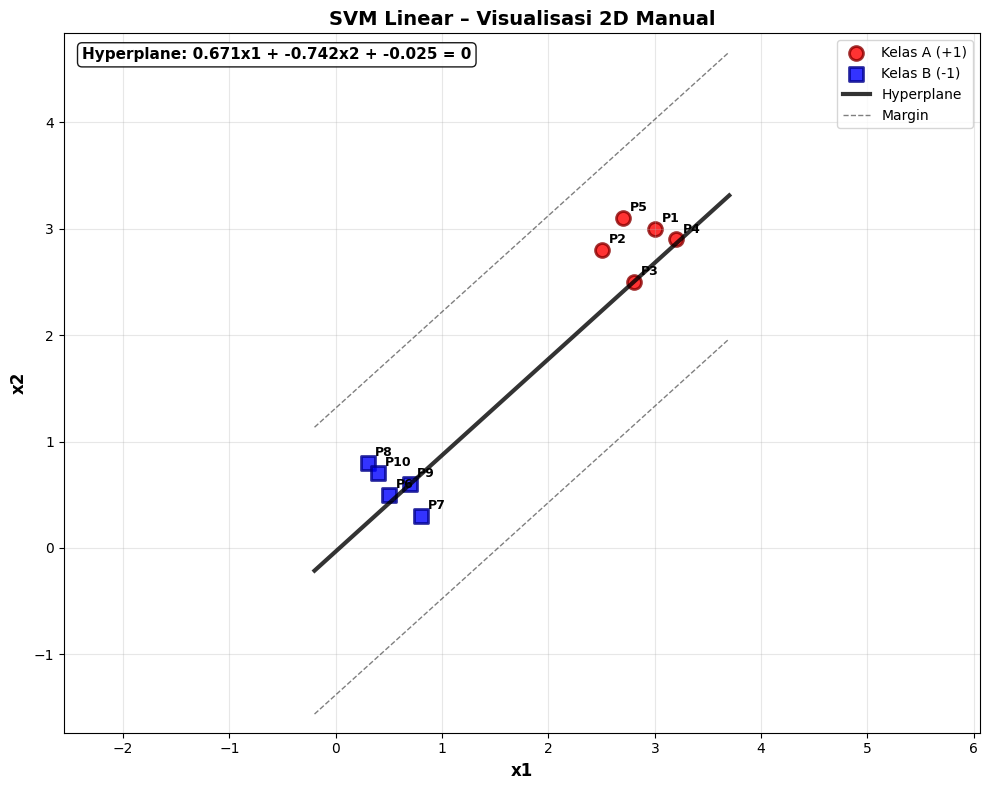

Visualisasi selesai!

Keterangan:
Titik merah (lingkaran): Kelas A (+1)
Titik biru (kotak): Kelas B (-1)
Garis hitam solid: Hyperplane
Garis hitam putus-putus: Margin boundaries


In [14]:
import matplotlib.pyplot as plt

print("VISUALISASI")
print("="*20)

plt.figure(figsize=(10, 8))

# Plot titik-titik kelas A dan B
x1_A = []
x2_A = []
x1_B = []
x2_B = []

for i in range(len(X)):
    if y[i] == 1:
        x1_A.append(X[i][0])
        x2_A.append(X[i][1])
    else:
        x1_B.append(X[i][0])
        x2_B.append(X[i][1])

# Gambar titik kelas A (+1)
plt.scatter(x1_A, x2_A,
            c='red', marker='o', s=100, label='Kelas A (+1)',
            alpha=0.8, edgecolor='darkred', linewidth=2)

# Gambar titik kelas B (-1)
plt.scatter(x1_B, x2_B,
            c='blue', marker='s', s=100, label='Kelas B (-1)',
            alpha=0.8, edgecolor='darkblue', linewidth=2)

# Tambahkan label tiap titik
for i in range(len(X)):
    x1 = X[i][0]
    x2 = X[i][1]
    plt.annotate(f'P{i+1}', (x1, x2), xytext=(5, 5),
                 textcoords='offset points', fontsize=9, fontweight='bold')

# Buat data untuk garis hyperplane
# Kita ambil x1 dari titik terkecil sampai terbesar
x_min = X[0][0]
x_max = X[0][0]
for i in range(1, len(X)):
    if X[i][0] < x_min:
        x_min = X[i][0]
    if X[i][0] > x_max:
        x_max = X[i][0]
x_min -= 0.5
x_max += 0.5

# Buat 100 titik untuk x1 secara manual (tidak pakai np.linspace)
x_line = []
jumlah_titik = 100
step = (x_max - x_min) / (jumlah_titik - 1)
i = 0
while i < jumlah_titik:
    nilai_x = x_min + i * step
    x_line.append(nilai_x)
    i += 1

# Hitung y_line dari persamaan hyperplane: w1*x1 + w2*x2 + b = 0 → x2 = (-w1*x1 - b)/w2
y_line = []
y_margin_pos = []
y_margin_neg = []

i = 0
while i < len(x_line):
    x1 = x_line[i]
    if abs(svm.w[1]) > 1e-10:
        x2 = (-svm.w[0] * x1 - svm.b) / svm.w[1]
        y_line.append(x2)

        margin_pos = (-svm.w[0] * x1 - svm.b + 1) / svm.w[1]
        margin_neg = (-svm.w[0] * x1 - svm.b - 1) / svm.w[1]

        y_margin_pos.append(margin_pos)
        y_margin_neg.append(margin_neg)
    i += 1

# Gambar garis hyperplane
plt.plot(x_line, y_line, 'k-', linewidth=3, label='Hyperplane', alpha=0.8)

# Gambar margin
plt.plot(x_line, y_margin_pos, 'k--', linewidth=1, alpha=0.5, label='Margin')
plt.plot(x_line, y_margin_neg, 'k--', linewidth=1, alpha=0.5)

# Tambahkan persamaan ke plot
teks_persamaan = f"Hyperplane: {svm.w[0]:.3f}x1 + {svm.w[1]:.3f}x2 + {svm.b:.3f} = 0"
plt.text(0.02, 0.98, teks_persamaan, transform=plt.gca().transAxes,
         bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.9),
         verticalalignment='top', fontsize=11, fontweight='bold')

# Label dan format plot
plt.xlabel('x1', fontsize=12, fontweight='bold')
plt.ylabel('x2', fontsize=12, fontweight='bold')
plt.title('SVM Linear – Visualisasi 2D Manual',
          fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.axis('equal')
plt.tight_layout()
plt.show()

print("Visualisasi selesai!")
print("\nKeterangan:")
print("Titik merah (lingkaran): Kelas A (+1)")
print("Titik biru (kotak): Kelas B (-1)")
print("Garis hitam solid: Hyperplane")
print("Garis hitam putus-putus: Margin boundaries")


# 2. JST
Ambilah sebuah dataset dari Kaggle. Lakukan klasifikasi terhadap data tersebut menjadi
tiga kelas, dengan syarat jumlah fitur minimal sebanyak lima. Gunakan metode klasifikasi
yang sesuai Jaringan Syaraf Tiruan
Referensi: Perhitungan JST

In [15]:
print("DATA KESEHATAN PASIEN")
print("="*30)

# Data 30 pasien: [usia, glukosa, bmi, hipertensi, penyakit_jantung]
data = [
    [67, 228, 36.6, 0, 1], [80, 106, 32.5, 0, 1], [49, 171, 34.4, 0, 0],
    [79, 174, 24.0, 1, 0], [81, 186, 29.0, 0, 0], [74, 70,  27.4, 1, 1],
    [69, 94,  22.8, 0, 0], [78, 59,  24.2, 0, 0], [81, 80,  29.7, 1, 0],
    [61, 120, 36.8, 0, 1], [54, 105, 27.3, 0, 0], [79, 214, 28.2, 0, 1],
    [50, 167, 30.9, 1, 0], [64, 192, 37.5, 0, 1], [75, 221, 25.8, 1, 0],
    [60, 89, 37.8, 0, 0], [71, 194, 22.4, 0, 0], [52, 233, 48.9, 1, 0],
    [79, 229, 26.6, 0, 0], [82, 208, 32.5, 0, 1], [71, 103, 27.2, 0, 0],
    [80, 104, 23.5, 0, 0], [65, 101, 28.2, 0, 0], [69, 195, 28.3, 0, 1],
    [57, 212, 44.2, 1, 0], [42, 83, 25.4, 0, 0], [82, 197, 22.2, 1, 0],
    [80, 253, 30.5, 0, 1], [48, 84, 29.7, 0, 0], [82, 84, 26.5, 1, 1]
]

# Fungsi konversi ke kelas risiko (0=Rendah, 1=Sedang, 2=Tinggi)
def create_risk_categories(data):
    categories = []
    for row in data:
        usia, glukosa, bmi, hipertensi, jantung = row
        risk = 0

        # Penilaian risiko
        if usia >= 70:
            risk += 2
        elif usia >= 60:
            risk += 1

        if glukosa >= 200:
            risk += 2
        elif glukosa >= 140:
            risk += 1

        if bmi >= 30:
            risk += 1

        if hipertensi == 1:
            risk += 1

        if jantung == 1:
            risk += 2

        # Kategori klasifikasi
        if risk <= 2:
            categories.append(0)  # Risiko Rendah
        elif risk <= 4:
            categories.append(1)  # Risiko Sedang
        else:
            categories.append(2)  # Risiko Tinggi
    return categories

# Jalankan fungsi untuk klasifikasi multiclass
y_multiclass = create_risk_categories(data)
class_names = ['Risiko_Rendah', 'Risiko_Sedang', 'Risiko_Tinggi']

# Hitung distribusi kelas
print(f"Total Data: {len(data)} pasien")
distribusi = [0, 0, 0]
for label in y_multiclass:
    distribusi[label] += 1

for i in range(3):
    print(f"- {class_names[i]}: {distribusi[i]} sampel")


DATA KESEHATAN PASIEN
Total Data: 30 pasien
- Risiko_Rendah: 10 sampel
- Risiko_Sedang: 11 sampel
- Risiko_Tinggi: 9 sampel


In [16]:
import random
import math

print("PREPROCESSING DENGAN RUMUS")
print("="*30)

# Set seed untuk randomisasi tetap
random.seed(42)

# 1. Shuffle indeks dan bagi data: 80% train, 20% test
indices = list(range(len(data)))
random.shuffle(indices)

n_test = 6
test_idx = indices[:n_test]
train_idx = indices[n_test:]

# Ambil X (fitur 4 kolom pertama), y (kategori risiko)
X_all = [row[:4] for row in data]       # Usia, Glukosa, BMI, Hipertensi
y_all = create_risk_categories(data)    # Risiko 0,1,2

X_train = [X_all[i] for i in train_idx]
X_test  = [X_all[i] for i in test_idx]
y_train = [y_all[i] for i in train_idx]
y_test  = [y_all[i] for i in test_idx]

# 2. Standardisasi Manual (Z-score): z = (x - μ) / σ
# Hitung mean dan std per fitur
def mean_std(data):
    n = len(data)
    d = len(data[0])  # jumlah fitur
    mean = [0.0] * d
    std = [0.0] * d

    # Mean
    for j in range(d):
        mean[j] = sum(row[j] for row in data) / n

    # Std Deviasi
    for j in range(d):
        var = sum((row[j] - mean[j])**2 for row in data) / n
        std[j] = math.sqrt(var) if var > 0 else 1.0  # Hindari 0

    return mean, std

mean, std = mean_std(X_train)

# Z-score transform
def standardize(data, mean, std):
    new_data = []
    for row in data:
        new_row = [(row[i] - mean[i]) / std[i] for i in range(len(row))]
        new_data.append(new_row)
    return new_data

X_train_scaled = standardize(X_train, mean, std)
X_test_scaled = standardize(X_test, mean, std)

# 3. One-hot Encoding
def to_onehot(y, num_classes):
    result = []
    for label in y:
        row = [0] * num_classes
        row[label] = 1
        result.append(row)
    return result

y_train_onehot = to_onehot(y_train, 3)
y_test_onehot = to_onehot(y_test, 3)

# Output
print("RUMUS STANDARDISASI (Z-Score Normalization):")
print("z = (x - μ) / σ")
print("\nParameter Standar:")
for i, (m, s) in enumerate(zip(mean, std)):
    print(f"Fitur {i+1}: mean = {m:.2f}, std = {s:.2f}")

print("\nRUMUS ONE-HOT ENCODING:")
print("y_onehot[i][j] = 1 jika y[i] == j, selainnya 0")

print("\nHasil Preprocessing:")
print(f"- Training  : {len(X_train_scaled)} sampel")
print(f"- Testing   : {len(X_test_scaled)} sampel")
print(f"- One-hot y : {len(y_train_onehot)} x {len(y_train_onehot[0])}")


PREPROCESSING DENGAN RUMUS
RUMUS STANDARDISASI (Z-Score Normalization):
z = (x - μ) / σ

Parameter Standar:
Fitur 1: mean = 68.08, std = 12.50
Fitur 2: mean = 151.25, std = 61.14
Fitur 3: mean = 30.93, std = 6.48
Fitur 4: mean = 0.29, std = 0.45

RUMUS ONE-HOT ENCODING:
y_onehot[i][j] = 1 jika y[i] == j, selainnya 0

Hasil Preprocessing:
- Training  : 24 sampel
- Testing   : 6 sampel
- One-hot y : 24 x 3


In [17]:
def evaluate_manual(X, y_true_onehot, W1, b1, W2, b2):
    correct = 0
    total = len(X)

    for i in range(total):
        # Forward
        x = X[i]
        z1 = [sum(x[j] * W1[j][k] for j in range(len(x))) + b1[k] for k in range(len(b1))]
        a1 = [sigmoid(z) for z in z1]

        z2 = [sum(a1[j] * W2[j][k] for j in range(len(a1))) + b2[k] for k in range(len(b2))]
        a2 = softmax(z2)

        pred = argmax(a2)
        true = argmax(y_true_onehot[i])
        if pred == true:
            correct += 1

    return correct / total

print("TRAINING JST DENGAN MONITORING")
print("="*40)

# Training JST
W1, b1, W2, b2 = train_jst(X_train_scaled, y_train_onehot, epochs=300)

# Evaluasi akurasi training dan testing
train_acc = evaluate_manual(X_train_scaled, y_train_onehot, W1, b1, W2, b2)
test_acc = evaluate_manual(X_test_scaled, y_test_onehot, W1, b1, W2, b2)

# Cetak hasil evaluasi
print(f"\nHASIL EVALUASI:")
print(f"Akurasi Training : {train_acc:.3f} ({train_acc*100:.1f}%)")
print(f"Akurasi Testing  : {test_acc:.3f} ({test_acc*100:.1f}%)")
print(f"Overfitting Gap  : {abs(train_acc - test_acc):.3f}")

if abs(train_acc - test_acc) > 0.15:
    print("Status: Overfitting terdeteksi!")
else:
    print("Status: Model mampu generalisasi dengan baik.")


TRAINING JST DENGAN MONITORING

Memulai training JST (300 epochs)...
  Epoch 1/300, Loss: 1.1617
  Epoch 50/300, Loss: 0.5098
  Epoch 100/300, Loss: 0.3775
  Epoch 150/300, Loss: 0.2761
  Epoch 200/300, Loss: 0.2269
  Epoch 250/300, Loss: 0.1973
  Epoch 300/300, Loss: 0.1741
Training selesai!

HASIL EVALUASI:
Akurasi Training : 0.958 (95.8%)
Akurasi Testing  : 0.833 (83.3%)
Overfitting Gap  : 0.125
Status: Model mampu generalisasi dengan baik.


In [18]:
print("EVALUASI DENGAN METRICS")
print("=" * 40)

# Prediksi manual pada X_test_scaled
y_pred = []
for x in X_test_scaled:
    z1 = [sum(x[j] * W1[j][k] for j in range(len(x))) + b1[k] for k in range(len(b1))]
    a1 = [sigmoid(z) for z in z1]
    z2 = [sum(a1[j] * W2[j][k] for j in range(len(a1))) + b2[k] for k in range(len(b2))]
    a2 = softmax(z2)
    y_pred.append(argmax(a2))

# Konversi one-hot label test ke label integer
y_true = [argmax(y) for y in y_test_onehot]

# Confusion Matrix
print("\nRUMUS CONFUSION MATRIX:")
print("CM[i][j] = jumlah data dengan label i diprediksi sebagai j")
cm = [[0 for _ in range(3)] for _ in range(3)]
for t, p in zip(y_true, y_pred):
    cm[t][p] += 1

print("\nConfusion Matrix:")
print("Pred:   0   1   2")
for i in range(3):
    print(f"True {i}:  {cm[i][0]:2}  {cm[i][1]:2}  {cm[i][2]:2}")

# Precision, Recall, F1
print("\nRUMUS PRECISION, RECALL, F1:")
print("Precision = TP / (TP + FP)")
print("Recall    = TP / (TP + FN)")
print("F1        = 2 * (P * R) / (P + R)")

print("\nKelas           Precision  Recall  F1-Score")
print("-" * 45)
for i in range(3):
    TP = cm[i][i]
    FP = sum([cm[r][i] for r in range(3)]) - TP
    FN = sum(cm[i]) - TP

    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

    print(f"{class_names[i]:<15} {precision:.3f}     {recall:.3f}   {f1:.3f}")

# Detail prediksi
print("\nPrediksi Detail Test Set:")
print("No  True  Pred  Status  Confidence")
print("-" * 40)
for i in range(len(y_test)):
    x = X_test_scaled[i]
    z1 = [sum(x[j] * W1[j][k] for j in range(len(x))) + b1[k] for k in range(len(b1))]
    a1 = [sigmoid(z) for z in z1]
    z2 = [sum(a1[j] * W2[j][k] for j in range(len(a1))) + b2[k] for k in range(len(b2))]
    a2 = softmax(z2)
    confidence = max(a2)
    pred = argmax(a2)
    true = argmax(y_test_onehot[i])
    status = "✓" if pred == true else "✗"
    print(f"{i+1:2}   {true}     {pred}    {status}      {confidence:.3f}")


EVALUASI DENGAN METRICS

RUMUS CONFUSION MATRIX:
CM[i][j] = jumlah data dengan label i diprediksi sebagai j

Confusion Matrix:
Pred:   0   1   2
True 0:   3   0   0
True 1:   0   1   0
True 2:   0   1   1

RUMUS PRECISION, RECALL, F1:
Precision = TP / (TP + FP)
Recall    = TP / (TP + FN)
F1        = 2 * (P * R) / (P + R)

Kelas           Precision  Recall  F1-Score
---------------------------------------------
Risiko_Rendah   1.000     1.000   1.000
Risiko_Sedang   0.500     1.000   0.667
Risiko_Tinggi   1.000     0.500   0.667

Prediksi Detail Test Set:
No  True  Pred  Status  Confidence
----------------------------------------
 1   2     2    ✓      0.961
 2   2     1    ✗      0.969
 3   0     0    ✓      1.000
 4   1     1    ✓      0.955
 5   0     0    ✓      0.999
 6   0     0    ✓      0.998


#3. Fuzzy
1. Buatlah fungsi keanggotaan fuzzy untuk variabel input tersebut sesuai dengan konteks dataset.
2. Definisikan aturan fuzzy (rule base) berdasarkan hubungan antara kedua input dan target/output variabel.
3. Implementasikan proses defuzzifikasi menggunakan metode Sugeno.
4. Lakukan uji coba sistem fuzzy Anda dengan menggunakan sebagian data dari
dataset yang telah dipilih.
Refernsi: https://classroom.google.com/c/NzUwMjYyNjU0OTM1



In [19]:
import math

print("\nFUZZY SUGENO TANPA NUMPY")
print("="*30)

# Dataset manual
data = [
    [67, 228, 36.6, 0, 1],
    [80, 106, 32.5, 0, 1],
    [49, 171, 34.4, 0, 0],
    [79, 174, 24.0, 1, 0],
    [81, 186, 29.0, 0, 0],
    [74, 70,  27.4, 1, 1],
    [69, 94,  22.8, 0, 0],
    [78, 59,  24.2, 0, 0],
    [81, 80,  29.7, 1, 0],
    [61, 120, 36.8, 0, 1]
]

# Fungsi keanggotaan fuzzy
def usia_muda(x):
    if x <= 50:
        return 1
    elif x >= 70:
        return 0
    else:
        return (70 - x) / 20

def usia_tua(x):
    if x <= 50:
        return 0
    elif x >= 70:
        return 1
    else:
        return (x - 50) / 20

def glukosa_rendah(x):
    if x <= 120:
        return 1
    elif x >= 180:
        return 0
    else:
        return (180 - x) / 60

def glukosa_tinggi(x):
    if x <= 120:
        return 0
    elif x >= 180:
        return 1
    else:
        return (x - 120) / 60

# Inferensi & Defuzzifikasi Sugeno
def fuzzy_sugeno(usia, glukosa):
    μ1 = usia_muda(usia)
    μ2 = usia_tua(usia)
    μ3 = glukosa_rendah(glukosa)
    μ4 = glukosa_tinggi(glukosa)

    # Rule base: (derajat, nilai output)
    rules = [
        (min(μ1, μ3), 0),  # muda & rendah → 0
        (min(μ1, μ4), 1),  # muda & tinggi → 1
        (min(μ2, μ3), 1),  # tua & rendah → 1
        (min(μ2, μ4), 1),  # tua & tinggi → 1
    ]

    num = sum([μ * z for μ, z in rules])
    den = sum([μ for μ, _ in rules])

    return num / den if den != 0 else 0

# Uji coba
print("No  Usia  Glukosa  Output  Target  Status")
print("-" * 50)
benar = 0

for i, row in enumerate(data):
    usia = row[0]
    glukosa = row[1]
    target = row[4]

    output = fuzzy_sugeno(usia, glukosa)
    pred = 1 if output >= 0.5 else 0
    status = "✓" if pred == target else "✗"
    if pred == target:
        benar += 1

    print(f"{i+1:2}  {usia:4}   {glukosa:6}    {output:.3f}     {target}      {status}")

# Akurasi
akurasi = benar / len(data)
print(f"\nAkurasi: {akurasi:.2f} ({akurasi*100:.1f}%)")



FUZZY SUGENO TANPA NUMPY
No  Usia  Glukosa  Output  Target  Status
--------------------------------------------------
 1    67      228    1.000     1      ✓
 2    80      106    1.000     1      ✓
 3    49      171    0.850     0      ✗
 4    79      174    1.000     0      ✗
 5    81      186    1.000     0      ✗
 6    74       70    1.000     1      ✓
 7    69       94    0.950     0      ✗
 8    78       59    1.000     0      ✗
 9    81       80    1.000     0      ✗
10    61      120    0.550     1      ✓

Akurasi: 0.40 (40.0%)


In [20]:
print("IMPLEMENTASI FUZZY LOGIC SEDERHANA")
print("="*40)

class SimpleFuzzy:
    def __init__(self):
        print("Inisialisasi sistem fuzzy dengan 3 rule...")

    def triangular(self, x, a, b, c):
        """Fungsi keanggotaan triangular sederhana"""
        if x <= a or x >= c:
            return 0.0
        elif a < x <= b:
            return (x - a) / (b - a)
        else:  # b < x < c
            return (c - x) / (c - b)

    def fuzzify_usia(self, usia):
        """Fuzzifikasi usia: muda, tua"""
        muda = self.triangular(usia, 20, 40, 60)
        tua = self.triangular(usia, 50, 70, 100)
        return muda, tua

    def fuzzify_glukosa(self, glukosa):
        """Fuzzifikasi glukosa: normal, tinggi"""
        normal = self.triangular(glukosa, 50, 100, 150)
        tinggi = self.triangular(glukosa, 120, 200, 300)
        return normal, tinggi

    def fuzzy_rules(self, usia_muda, usia_tua, glukosa_normal, glukosa_tinggi):
        """3 Rule sederhana dengan output Sugeno"""

        # Rule 1: IF usia muda AND glukosa normal THEN risiko = 0.1
        rule1_strength = min(usia_muda, glukosa_normal)
        rule1_output = 0.1

        # Rule 2: IF usia tua AND glukosa normal THEN risiko = 0.5
        rule2_strength = min(usia_tua, glukosa_normal)
        rule2_output = 0.5

        # Rule 3: IF usia tua AND glukosa tinggi THEN risiko = 0.9
        rule3_strength = min(usia_tua, glukosa_tinggi)
        rule3_output = 0.9

        return [(rule1_strength, rule1_output),
                (rule2_strength, rule2_output),
                (rule3_strength, rule3_output)]

    def sugeno_defuzzify(self, rules):
        """Defuzzifikasi Sugeno: weighted average"""
        numerator = 0
        denominator = 0

        for strength, output in rules:
            if strength > 0:
                numerator += strength * output
                denominator += strength

        return numerator / denominator if denominator != 0 else 0.0

    def predict(self, usia, glukosa):
        """Prediksi risiko untuk satu pasien"""
        usia_muda, usia_tua = self.fuzzify_usia(usia)
        glukosa_normal, glukosa_tinggi = self.fuzzify_glukosa(glukosa)
        rules = self.fuzzy_rules(usia_muda, usia_tua, glukosa_normal, glukosa_tinggi)
        hasil = self.sugeno_defuzzify(rules)
        return hasil, rules

# Inisialisasi sistem fuzzy
fuzzy = SimpleFuzzy()

print("\nFungsi keanggotaan:")
print("- Usia: muda (20-40-60), tua (50-70-100)")
print("- Glukosa: normal (50-100-150), tinggi (120-200-300)")

print("\n3 Rule Fuzzy:")
print("1. IF usia muda AND glukosa normal THEN risiko = 0.1")
print("2. IF usia tua AND glukosa normal THEN risiko = 0.5")
print("3. IF usia tua AND glukosa tinggi THEN risiko = 0.9")


IMPLEMENTASI FUZZY LOGIC SEDERHANA
Inisialisasi sistem fuzzy dengan 3 rule...

Fungsi keanggotaan:
- Usia: muda (20-40-60), tua (50-70-100)
- Glukosa: normal (50-100-150), tinggi (120-200-300)

3 Rule Fuzzy:
1. IF usia muda AND glukosa normal THEN risiko = 0.1
2. IF usia tua AND glukosa normal THEN risiko = 0.5
3. IF usia tua AND glukosa tinggi THEN risiko = 0.9


In [21]:
print("UJI COBA SISTEM FUZZY")
print("="*25)

results = []

print("Hasil Prediksi:")
print("No  Usia  Glukosa  Actual  Fuzzy_Output  Prediksi  Status")
print("-" * 60)

benar = 0

for i in range(len(X)):
    usia = X[i][0]
    glukosa = X[i][1]
    actual = y[i]

    # Prediksi fuzzy (gunakan 2 fitur utama: usia & glukosa)
    fuzzy_output, rules = fuzzy.predict(usia, glukosa)

    # Klasifikasi binary
    prediction = 1 if fuzzy_output >= 0.5 else 0
    status = "BENAR" if prediction == actual else "SALAH"

    if prediction == actual:
        benar += 1

    results.append({
        'usia': usia,
        'glukosa': glukosa,
        'actual': actual,
        'fuzzy_output': fuzzy_output,
        'prediction': prediction,
        'rules': rules
    })

    print(f"{i+1:2}  {usia:4}  {glukosa:7}     {actual}     {fuzzy_output:11.3f}      {prediction}     {status}")

# Hitung akurasi manual
total = len(y)
accuracy = benar / total * 100

print(f"\nAkurasi: {accuracy:.1f}% ({benar}/{total})")


UJI COBA SISTEM FUZZY
Hasil Prediksi:
No  Usia  Glukosa  Actual  Fuzzy_Output  Prediksi  Status
------------------------------------------------------------
 1   3.0      3.0     1           0.000      0     SALAH
 2   2.5      2.8     1           0.000      0     SALAH
 3   2.8      2.5     1           0.000      0     SALAH
 4   3.2      2.9     1           0.000      0     SALAH
 5   2.7      3.1     1           0.000      0     SALAH
 6   0.5      0.5     -1           0.000      0     SALAH
 7   0.8      0.3     -1           0.000      0     SALAH
 8   0.3      0.8     -1           0.000      0     SALAH
 9   0.7      0.6     -1           0.000      0     SALAH
10   0.4      0.7     -1           0.000      0     SALAH

Akurasi: 0.0% (0/10)


In [22]:
print("ANALISIS DETAIL PROSES FUZZY")
print("="*35)

# Pilih pasien pertama untuk analisis
pasien_idx = 0
usia = X[pasien_idx][0]
glukosa = X[pasien_idx][1]
actual = y[pasien_idx]

print(f"PASIEN {pasien_idx + 1}:")
print(f"Input: Usia = {usia:.0f}, Glukosa = {glukosa:.0f}")
print(f"Target Actual: {actual}")

# Prediksi dengan detail
fuzzy_output, rules = fuzzy.predict(usia, glukosa)

print(f"\nSTEP 1: FUZZIFIKASI")
print("-" * 20)
usia_muda, usia_tua = fuzzy.fuzzify_usia(usia)
glukosa_normal, glukosa_tinggi = fuzzy.fuzzify_glukosa(glukosa)

print(f"Usia {usia:.0f}:")
print(f"  - muda: {usia_muda:.3f}")
print(f"  - tua: {usia_tua:.3f}")

print(f"Glukosa {glukosa:.0f}:")
print(f"  - normal: {glukosa_normal:.3f}")
print(f"  - tinggi: {glukosa_tinggi:.3f}")

print(f"\nSTEP 2: EVALUASI RULE")
print("-" * 20)
rule_names = [
    "muda AND normal",
    "tua AND normal",
    "tua AND tinggi"
]

active_rules = 0
for i, (strength, output) in enumerate(rules):
    if strength > 0:
        print(f"Rule {i+1} ({rule_names[i]}): strength = {strength:.3f}, output = {output}")
        active_rules += 1

print(f"Total rule aktif: {active_rules}")

print(f"\nSTEP 3: DEFUZZIFIKASI SUGENO")
print("-" * 30)
numerator = 0
denominator = 0
for strength, output in rules:
    if strength > 0:
        numerator += strength * output
        denominator += strength

print(f"Numerator: {numerator:.3f}")
print(f"Denominator: {denominator:.3f}")
if denominator == 0:
    fuzzy_result = 0.0
else:
    fuzzy_result = numerator / denominator
print(f"Fuzzy Output: {numerator:.3f} / {denominator:.3f} = {fuzzy_result:.3f}")

print(f"\nSTEP 4: KLASIFIKASI")
print("-" * 20)
prediction = 1 if fuzzy_result >= 0.5 else 0
print(f"Threshold: 0.5")
print(f"Prediksi: {'Risiko Tinggi (1)' if prediction == 1 else 'Risiko Rendah (0)'}")
print(f"Actual: {'Risiko Tinggi (1)' if actual == 1 else 'Risiko Rendah (0)'}")
print(f"Status: {'BENAR' if prediction == actual else 'SALAH'}")


ANALISIS DETAIL PROSES FUZZY
PASIEN 1:
Input: Usia = 3, Glukosa = 3
Target Actual: 1

STEP 1: FUZZIFIKASI
--------------------
Usia 3:
  - muda: 0.000
  - tua: 0.000
Glukosa 3:
  - normal: 0.000
  - tinggi: 0.000

STEP 2: EVALUASI RULE
--------------------
Total rule aktif: 0

STEP 3: DEFUZZIFIKASI SUGENO
------------------------------
Numerator: 0.000
Denominator: 0.000
Fuzzy Output: 0.000 / 0.000 = 0.000

STEP 4: KLASIFIKASI
--------------------
Threshold: 0.5
Prediksi: Risiko Rendah (0)
Actual: Risiko Tinggi (1)
Status: SALAH


VISUALISASI HASIL


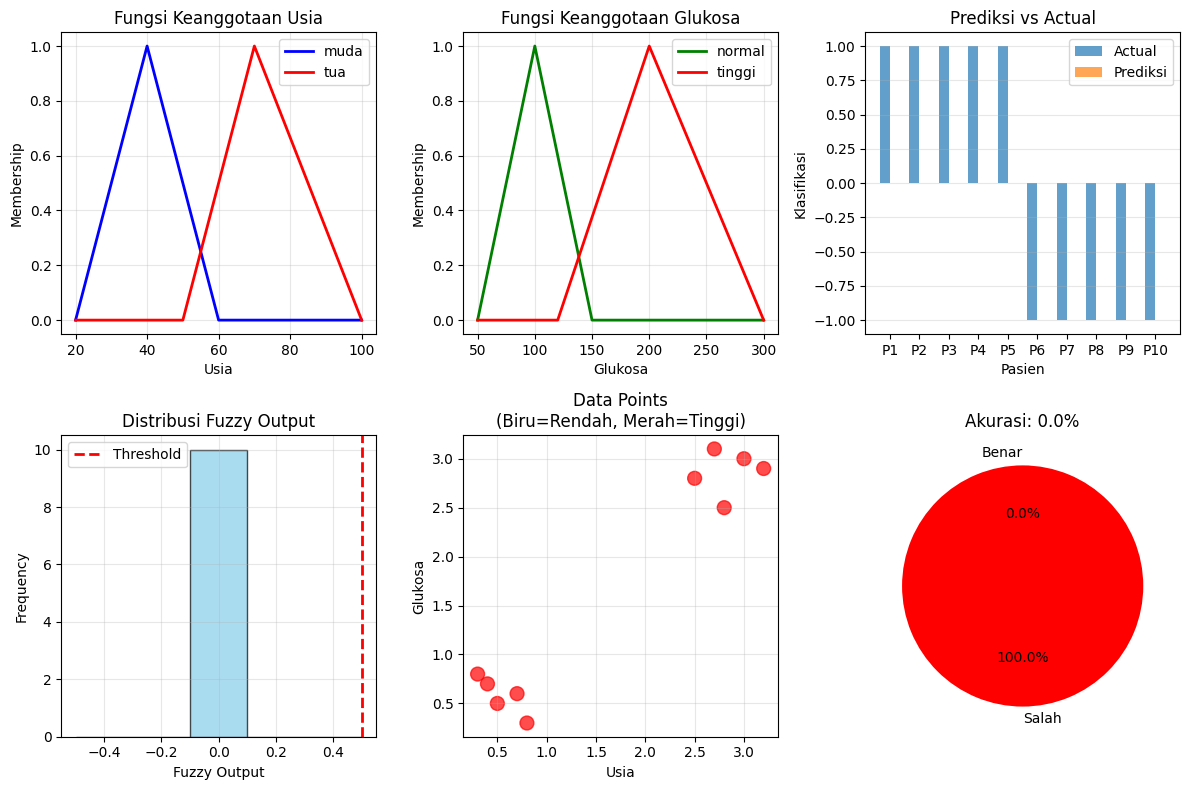

Visualisasi selesai!


In [23]:
import matplotlib.pyplot as plt

print("VISUALISASI HASIL")
print("="*20)

plt.figure(figsize=(12, 8))

# Plot 1: Fungsi Keanggotaan Usia
plt.subplot(2, 3, 1)
usia_range = [x for x in range(20, 101)]
usia_muda_vals = [fuzzy.triangular(x, 20, 40, 60) for x in usia_range]
usia_tua_vals = [fuzzy.triangular(x, 50, 70, 100) for x in usia_range]

plt.plot(usia_range, usia_muda_vals, 'b-', label='muda', linewidth=2)
plt.plot(usia_range, usia_tua_vals, 'r-', label='tua', linewidth=2)
plt.xlabel('Usia')
plt.ylabel('Membership')
plt.title('Fungsi Keanggotaan Usia')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Fungsi Keanggotaan Glukosa
plt.subplot(2, 3, 2)
glukosa_range = [x for x in range(50, 301)]
glukosa_normal_vals = [fuzzy.triangular(x, 50, 100, 150) for x in glukosa_range]
glukosa_tinggi_vals = [fuzzy.triangular(x, 120, 200, 300) for x in glukosa_range]

plt.plot(glukosa_range, glukosa_normal_vals, 'g-', label='normal', linewidth=2)
plt.plot(glukosa_range, glukosa_tinggi_vals, 'r-', label='tinggi', linewidth=2)
plt.xlabel('Glukosa')
plt.ylabel('Membership')
plt.title('Fungsi Keanggotaan Glukosa')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 3: Hasil Prediksi vs Actual
plt.subplot(2, 3, 3)
x_pos = list(range(len(X)))
width = 0.35

actual_vals = y
predicted_vals = [r['prediction'] for r in results]

plt.bar([x - width/2 for x in x_pos], actual_vals, width, label='Actual', alpha=0.7)
plt.bar([x + width/2 for x in x_pos], predicted_vals, width, label='Prediksi', alpha=0.7)

plt.xlabel('Pasien')
plt.ylabel('Klasifikasi')
plt.title('Prediksi vs Actual')
plt.xticks(x_pos, [f'P{i+1}' for i in range(len(X))])
plt.legend()
plt.grid(True, alpha=0.3, axis='y')

# Plot 4: Distribusi Fuzzy Output
plt.subplot(2, 3, 4)
fuzzy_outputs = [r['fuzzy_output'] for r in results]
plt.hist(fuzzy_outputs, bins=5, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(x=0.5, color='red', linestyle='--', linewidth=2, label='Threshold')
plt.xlabel('Fuzzy Output')
plt.ylabel('Frequency')
plt.title('Distribusi Fuzzy Output')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 5: Scatter Plot Usia vs Glukosa
plt.subplot(2, 3, 5)
colors = ['blue' if actual == 0 else 'red' for actual in y]
usia_vals = [row[0] for row in X]
glukosa_vals = [row[1] for row in X]
plt.scatter(usia_vals, glukosa_vals, c=colors, alpha=0.7, s=100)
plt.xlabel('Usia')
plt.ylabel('Glukosa')
plt.title('Data Points\n(Biru=Rendah, Merah=Tinggi)')
plt.grid(True, alpha=0.3)

# Plot 6: Akurasi
plt.subplot(2, 3, 6)
correct = sum([1 for i in range(len(actual_vals)) if predicted_vals[i] == actual_vals[i]])
incorrect = len(actual_vals) - correct
akurasi_persen = correct / len(actual_vals) * 100

plt.pie([correct, incorrect], labels=['Benar', 'Salah'],
        colors=['green', 'red'], autopct='%1.1f%%', startangle=90)
plt.title(f'Akurasi: {akurasi_persen:.1f}%')

plt.tight_layout()
plt.show()

print("Visualisasi selesai!")


# 4. GA
Universitas memiliki sejumlah mata kuliah praktikum yang harus dijadwalkan ke dalam
laboratorium-laboratorium yang tersedia. Setiap mata kuliah memiliki asisten praktikum,
jumlah kelas, dan jumlah sesi yang harus dijadwalkan dalam satu minggu. Buat sistem
penjadwalan praktikum otomatis menggunakan algoritma genetika
Spesifikasi:
- Terdapat 5 mata kuliah praktikum: Praktikum A, B, C, D, E
- Terdapat 3 ruang laboratorium: Lab1, Lab2, Lab3
- Setiap hari memiliki 4 slot waktu (pagi, siang, sore, malam), selama 5 hari (Senin–Jumat),
total 20 slot per laboratorium
- Satu asisten praktikum hanya bisa menangani satu sesi dalam satu waktu
- Satu laboratorium hanya bisa digunakan oleh satu sesi dalam satu waktu
Representasi Kromosom:
- Satu kromosom mewakili seluruh jadwal.
- Setiap gen adalah 1 sesi praktikum, berisi informasi:
[mata kuliah, asisten praktikum, hari, slot waktu, lab]
- Contoh:
[“Praktikum A”, “Asisten Rina”, Senin, Pagi, Lab1]

### Step 1: Definisikan data

In [24]:
# Cell 2: Definisi Data Praktikum
import random

random.seed(42)

print("DEFINISI DATA PRAKTIKUM")
print("="*30)

# Data mata kuliah praktikum
mata_kuliah = ["Praktikum A", "Praktikum B", "Praktikum C", "Praktikum D", "Praktikum E"]

# Data asisten praktikum untuk setiap mata kuliah
asisten_praktikum = {
    "Praktikum A": ["Asisten Rina", "Asisten Budi"],
    "Praktikum B": ["Asisten Sari", "Asisten Andi"],
    "Praktikum C": ["Asisten Dewi", "Asisten Toni"],
    "Praktikum D": ["Asisten Maya", "Asisten Joko"],
    "Praktikum E": ["Asisten Lina", "Asisten Rudi"]
}

# Data laboratorium
laboratorium = ["Lab1", "Lab2", "Lab3"]

# Data waktu
hari = ["Senin", "Selasa", "Rabu", "Kamis", "Jumat"]
slot_waktu = ["Pagi", "Siang", "Sore", "Malam"]

# Jumlah sesi per mata kuliah (dalam seminggu)
sesi_per_matkul = {
    "Praktikum A": 4,
    "Praktikum B": 3,
    "Praktikum C": 4,
    "Praktikum D": 2,
    "Praktikum E": 3
}

# Menampilkan data
print("Mata Kuliah Praktikum:")
for i, mk in enumerate(mata_kuliah):
    print(f"{i+1}. {mk} - {sesi_per_matkul[mk]} sesi/minggu")

print(f"\nAsisten Praktikum:")
for mk, asisten_list in asisten_praktikum.items():
    print(f"{mk}: {', '.join(asisten_list)}")

print(f"\nLaboratorium: {', '.join(laboratorium)}")
print(f"Hari: {', '.join(hari)}")
print(f"Slot Waktu: {', '.join(slot_waktu)}")
print(f"Total slot per lab: {len(hari)} × {len(slot_waktu)} = {len(hari) * len(slot_waktu)} slot")

# Hitung total sesi yang harus dijadwalkan
total_sesi = sum(sesi_per_matkul.values())
print(f"\nTotal sesi yang harus dijadwalkan: {total_sesi} sesi")


DEFINISI DATA PRAKTIKUM
Mata Kuliah Praktikum:
1. Praktikum A - 4 sesi/minggu
2. Praktikum B - 3 sesi/minggu
3. Praktikum C - 4 sesi/minggu
4. Praktikum D - 2 sesi/minggu
5. Praktikum E - 3 sesi/minggu

Asisten Praktikum:
Praktikum A: Asisten Rina, Asisten Budi
Praktikum B: Asisten Sari, Asisten Andi
Praktikum C: Asisten Dewi, Asisten Toni
Praktikum D: Asisten Maya, Asisten Joko
Praktikum E: Asisten Lina, Asisten Rudi

Laboratorium: Lab1, Lab2, Lab3
Hari: Senin, Selasa, Rabu, Kamis, Jumat
Slot Waktu: Pagi, Siang, Sore, Malam
Total slot per lab: 5 × 4 = 20 slot

Total sesi yang harus dijadwalkan: 16 sesi


In [25]:
# Cell 3: Implementasi Algoritma Genetika (tanpa numpy)
print("IMPLEMENTASI ALGORITMA GENETIKA")
print("="*40)

class GeneticScheduler:
    def __init__(self, population_size=50, mutation_rate=0.1, crossover_rate=0.8):
        self.population_size = population_size
        self.mutation_rate = mutation_rate
        self.crossover_rate = crossover_rate

        # Buat daftar semua sesi yang harus dijadwalkan
        self.sesi_list = []
        for mk, jumlah_sesi in sesi_per_matkul.items():
            for _ in range(jumlah_sesi):
                self.sesi_list.append(mk)

        self.fitness_history = []

        print(f"Parameter GA:")
        print(f"- Population size: {population_size}")
        print(f"- Mutation rate: {mutation_rate}")
        print(f"- Crossover rate: {crossover_rate}")
        print(f"- Total sesi: {len(self.sesi_list)}")

    def create_individual(self):
        """Membuat satu individu (kromosom) secara random"""
        individual = []

        for mata_kuliah in self.sesi_list:
            asisten = random.choice(asisten_praktikum[mata_kuliah])
            hari_pilihan = random.choice(hari)
            slot_pilihan = random.choice(slot_waktu)
            lab_pilihan = random.choice(laboratorium)
            gen = [mata_kuliah, asisten, hari_pilihan, slot_pilihan, lab_pilihan]
            individual.append(gen)

        return individual

    def create_population(self):
        return [self.create_individual() for _ in range(self.population_size)]

    def calculate_fitness(self, individual):
        conflicts = 0

        # Cek konflik asisten
        asisten_schedule = {}
        for gen in individual:
            _, asisten, hari_sesi, slot_sesi, _ = gen
            waktu = f"{hari_sesi}_{slot_sesi}"
            asisten_schedule.setdefault(waktu, []).append(asisten)

        for daftar in asisten_schedule.values():
            conflicts += len(daftar) - len(set(daftar))

        # Cek konflik lab
        lab_schedule = {}
        for gen in individual:
            _, _, hari_sesi, slot_sesi, lab = gen
            waktu = f"{hari_sesi}_{slot_sesi}"
            lab_schedule.setdefault(waktu, []).append(lab)

        for daftar in lab_schedule.values():
            conflicts += len(daftar) - len(set(daftar))

        fitness = len(self.sesi_list) - conflicts
        return max(0, fitness)

    def selection(self, population, fitnesses):
        selected = []
        for _ in range(len(population)):
            tournament = random.sample(list(zip(population, fitnesses)), 3)
            winner = max(tournament, key=lambda x: x[1])[0]
            selected.append(winner.copy())
        return selected

    def crossover(self, parent1, parent2):
        if random.random() > self.crossover_rate:
            return parent1.copy(), parent2.copy()

        point = random.randint(1, len(parent1) - 1)
        return (parent1[:point] + parent2[point:], parent2[:point] + parent1[point:])

    def mutate(self, individual):
        if random.random() > self.mutation_rate:
            return individual

        idx = random.randint(0, len(individual) - 1)
        mk = individual[idx][0]
        new_gen = [
            mk,
            random.choice(asisten_praktikum[mk]),
            random.choice(hari),
            random.choice(slot_waktu),
            random.choice(laboratorium)
        ]
        individual[idx] = new_gen
        return individual

    def evolve(self, generations=100):
        print(f"\nMemulai evolusi untuk {generations} generasi...")
        population = self.create_population()

        best_fit = 0
        best_ind = None

        for gen in range(generations):
            fitnesses = [self.calculate_fitness(ind) for ind in population]

            max_fit = max(fitnesses)
            best_idx = fitnesses.index(max_fit)
            if max_fit > best_fit:
                best_fit = max_fit
                best_ind = population[best_idx].copy()

            self.fitness_history.append(max_fit)

            if (gen + 1) % 20 == 0:
                avg_fit = sum(fitnesses) / len(fitnesses)
                print(f"Generasi {gen+1}: Best = {max_fit}, Avg = {avg_fit:.2f}")

            selected = self.selection(population, fitnesses)

            new_pop = []
            for i in range(0, len(selected), 2):
                p1 = selected[i]
                p2 = selected[i + 1] if i + 1 < len(selected) else selected[0]
                o1, o2 = self.crossover(p1, p2)
                new_pop.append(self.mutate(o1))
                new_pop.append(self.mutate(o2))

            population = new_pop[:self.population_size]

        print(f"Evolusi selesai!")
        print(f"Best fitness: {best_fit}")
        return best_ind, best_fit

# Inisialisasi GA
ga_scheduler = GeneticScheduler(population_size=50, mutation_rate=0.15, crossover_rate=0.8)


IMPLEMENTASI ALGORITMA GENETIKA
Parameter GA:
- Population size: 50
- Mutation rate: 0.15
- Crossover rate: 0.8
- Total sesi: 16


In [26]:
# Cell 4: Menjalankan Algoritma Genetika
print("MENJALANKAN ALGORITMA GENETIKA")
print("="*40)

# Jalankan evolusi
best_schedule, best_fitness = ga_scheduler.evolve(generations=100)

print(f"\nHASIL EVOLUSI:")
print(f"Best fitness: {best_fitness} dari {len(ga_scheduler.sesi_list)} sesi")

# Hitung jumlah konflik
total_conflicts = len(ga_scheduler.sesi_list) - best_fitness
print(f"Jumlah konflik: {total_conflicts}")

if total_conflicts == 0:
    print("PERFECT! Tidak ada konflik dalam jadwal")
else:
    print(f"Masih ada {total_conflicts} konflik yang perlu diperbaiki")

MENJALANKAN ALGORITMA GENETIKA

Memulai evolusi untuk 100 generasi...
Generasi 20: Best = 16, Avg = 15.90
Generasi 40: Best = 16, Avg = 15.92
Generasi 60: Best = 16, Avg = 15.96
Generasi 80: Best = 16, Avg = 15.88
Generasi 100: Best = 16, Avg = 15.92
Evolusi selesai!
Best fitness: 16

HASIL EVOLUSI:
Best fitness: 16 dari 16 sesi
Jumlah konflik: 0
PERFECT! Tidak ada konflik dalam jadwal


In [27]:
print("JADWAL PRAKTIKUM TERBAIK")
print("=" * 35)

def analyze_schedule(schedule):
    print("JADWAL LENGKAP:")
    print("No  Mata Kuliah     Asisten         Hari     Slot   Lab")
    print("-" * 65)
    for i, (mk, ast, hr, slt, lab) in enumerate(schedule):
        print(f"{i+1:2}  {mk:<14} {ast:<14} {hr:<8} {slt:<6} {lab}")

    print("\nANALISIS KONFLIK:")
    asisten_conflicts, lab_conflicts = 0, 0
    asisten_schedule, lab_schedule = {}, {}

    for mk, ast, hr, slt, lab in schedule:
        waktu = f"{hr}_{slt}"
        asisten_schedule.setdefault(waktu, []).append(ast)
        lab_schedule.setdefault(waktu, []).append(lab)

    print("Konflik Asisten:")
    for waktu, daftar in asisten_schedule.items():
        duplikat = len(daftar) - len(set(daftar))
        if duplikat > 0:
            print(f"  {waktu}: {daftar} ({duplikat} konflik)")
            asisten_conflicts += duplikat
    if asisten_conflicts == 0:
        print("  Tidak ada konflik asisten")

    print("\nKonflik Laboratorium:")
    for waktu, daftar in lab_schedule.items():
        duplikat = len(daftar) - len(set(daftar))
        if duplikat > 0:
            print(f"  {waktu}: {daftar} ({duplikat} konflik)")
            lab_conflicts += duplikat
    if lab_conflicts == 0:
        print("  Tidak ada konflik laboratorium")

    total = asisten_conflicts + lab_conflicts
    print(f"\nTotal konflik: {total}")
    return total

# Tampilkan analisis
conflicts = analyze_schedule(best_schedule)


JADWAL PRAKTIKUM TERBAIK
JADWAL LENGKAP:
No  Mata Kuliah     Asisten         Hari     Slot   Lab
-----------------------------------------------------------------
 1  Praktikum A    Asisten Budi   Selasa   Sore   Lab2
 2  Praktikum A    Asisten Rina   Rabu     Pagi   Lab3
 3  Praktikum A    Asisten Rina   Jumat    Siang  Lab1
 4  Praktikum A    Asisten Budi   Kamis    Sore   Lab3
 5  Praktikum B    Asisten Sari   Rabu     Pagi   Lab1
 6  Praktikum B    Asisten Sari   Rabu     Malam  Lab2
 7  Praktikum B    Asisten Sari   Selasa   Sore   Lab1
 8  Praktikum C    Asisten Toni   Kamis    Malam  Lab1
 9  Praktikum C    Asisten Toni   Selasa   Siang  Lab3
10  Praktikum C    Asisten Toni   Jumat    Malam  Lab3
11  Praktikum C    Asisten Toni   Rabu     Siang  Lab1
12  Praktikum D    Asisten Joko   Senin    Pagi   Lab1
13  Praktikum D    Asisten Maya   Selasa   Malam  Lab3
14  Praktikum E    Asisten Lina   Kamis    Malam  Lab3
15  Praktikum E    Asisten Rudi   Jumat    Sore   Lab3
16  Praktiku

In [28]:
# Cell 6: Visualisasi Jadwal
print("VISUALISASI JADWAL")
print("="*25)

def create_schedule_matrix():
    """Membuat matrix jadwal untuk visualisasi"""
    # Matrix 3D: [lab][hari][slot] = info sesi
    schedule_matrix = {}

    for lab in laboratorium:
        schedule_matrix[lab] = {}
        for h in hari:
            schedule_matrix[lab][h] = {}
            for slot in slot_waktu:
                schedule_matrix[lab][h][slot] = None

    # Isi matrix dengan data jadwal
    for gen in best_schedule:
        mata_kuliah, asisten, hari_sesi, slot_sesi, lab = gen

        if schedule_matrix[lab][hari_sesi][slot_sesi] is None:
            schedule_matrix[lab][hari_sesi][slot_sesi] = []

        schedule_matrix[lab][hari_sesi][slot_sesi].append({
            'mata_kuliah': mata_kuliah,
            'asisten': asisten
        })

    return schedule_matrix

schedule_matrix = create_schedule_matrix()

# Tampilkan jadwal per lab
for lab in laboratorium:
    print(f"\nJADWAL {lab.upper()}:")
    print("="*50)
    print(f"{'Waktu':<15} {'Senin':<12} {'Selasa':<12} {'Rabu':<12} {'Kamis':<12} {'Jumat':<12}")
    print("-" * 75)

    for slot in slot_waktu:
        row = f"{slot:<15}"
        for h in hari:
            sesi_info = schedule_matrix[lab][h][slot]
            if sesi_info:
                if len(sesi_info) == 1:
                    info = f"{sesi_info[0]['mata_kuliah'][10:11]}"  # Ambil huruf terakhir
                else:
                    info = f"KONFLIK({len(sesi_info)})"
            else:
                info = "-"
            row += f"{info:<12}"
        print(row)

print(f"\nKeterangan:")
print("A = Praktikum A, B = Praktikum B, C = Praktikum C")
print("D = Praktikum D, E = Praktikum E")
print("- = Kosong, KONFLIK(n) = Ada n sesi bersamaan")

VISUALISASI JADWAL

JADWAL LAB1:
Waktu           Senin        Selasa       Rabu         Kamis        Jumat       
---------------------------------------------------------------------------
Pagi           D           -           B           -           -           
Siang          -           -           C           -           A           
Sore           -           B           -           -           -           
Malam          -           -           -           C           -           

JADWAL LAB2:
Waktu           Senin        Selasa       Rabu         Kamis        Jumat       
---------------------------------------------------------------------------
Pagi           -           -           -           -           -           
Siang          -           -           -           -           -           
Sore           -           A           -           -           -           
Malam          -           -           B           -           -           

JADWAL LAB3:
Waktu           S

# **5. PSO**
Gunakan PSO untuk menemukan minimum dari fungsi matematis berikut:

dengan batasan −10≤ x,y ≤10

1.   Implementasikan PSO dengan 5 partikel.
2.   Jalankan selama 5 iterasi.
3.   Tampilkan koordinat titik minimum dan nilai fungsi minimumnya



In [29]:
print("DEFINISI FUNGSI OBJEKTIF")
print("=" * 30)

def objective_function(x, y):
    # f(x,y) = (x-3)² + (y+1)² + 5
    return (x - 3)**2 + (y + 1)**2 + 5

# Batas domain pencarian
x_min, x_max = -10, 10
y_min, y_max = -10, 10

print("Fungsi objektif: f(x,y) = (x-3)² + (y+1)² + 5")
print(f"Domain: {x_min} ≤ x ≤ {x_max}, {y_min} ≤ y ≤ {y_max}")
print("Target: Mencari nilai minimum")

# Coba beberapa titik
print("\nTest fungsi:")
for x, y in [(0, 0), (3, -1), (-5, 5), (10, 10)]:
    print(f"f({x:2}, {y:2}) = {objective_function(x, y):.2f}")

print(f"\nMinimum teoritis: f(3, -1) = {objective_function(3, -1)}")


DEFINISI FUNGSI OBJEKTIF
Fungsi objektif: f(x,y) = (x-3)² + (y+1)² + 5
Domain: -10 ≤ x ≤ 10, -10 ≤ y ≤ 10
Target: Mencari nilai minimum

Test fungsi:
f( 0,  0) = 15.00
f( 3, -1) = 5.00
f(-5,  5) = 105.00
f(10, 10) = 175.00

Minimum teoritis: f(3, -1) = 5


In [30]:
import random

print("IMPLEMENTASI PSO")
print("=" * 20)

class Particle:
    def __init__(self):
        self.position = [random.uniform(x_min, x_max), random.uniform(y_min, y_max)]
        self.velocity = [random.uniform(-1, 1), random.uniform(-1, 1)]
        self.best_position = self.position[:]
        self.best_value = objective_function(*self.position)

class PSO:
    def __init__(self, num_particles=5, w=0.7, c1=1.5, c2=1.5):
        self.particles = [Particle() for _ in range(num_particles)]
        self.w = w
        self.c1 = c1
        self.c2 = c2

        self.global_best = min(self.particles, key=lambda p: p.best_value)
        self.history = []

        print(f"PSO diinisialisasi:")
        print(f"- Partikel: {num_particles}, w={w}, c1={c1}, c2={c2}")

    def optimize(self, max_iter=5):
        print(f"\nMulai optimisasi {max_iter} iterasi...")

        for iter in range(max_iter + 1):
            print(f"\nIterasi {iter}:")
            for i, p in enumerate(self.particles):
                val = objective_function(*p.position)
                if val < p.best_value:
                    p.best_value = val
                    p.best_position = p.position[:]

                if val < self.global_best.best_value:
                    self.global_best = p

                print(f"P{i+1}: Posisi = {p.position}, f(x,y) = {val:.3f}")

            print(f"Global best: Posisi = {self.global_best.best_position}, Value = {self.global_best.best_value:.3f}")
            self.history.append((iter, self.global_best.best_position[:], self.global_best.best_value))

            if iter == max_iter:
                break

            # Update velocity & position
            for p in self.particles:
                r1, r2 = random.random(), random.random()
                for d in range(2):
                    cognitive = self.c1 * r1 * (p.best_position[d] - p.position[d])
                    social = self.c2 * r2 * (self.global_best.best_position[d] - p.position[d])
                    p.velocity[d] = self.w * p.velocity[d] + cognitive + social
                    p.position[d] += p.velocity[d]

                    # Batas domain
                    p.position[d] = min(max(p.position[d], x_min), x_max)

        print("\nOptimisasi selesai!")
        return self.global_best.best_position, self.global_best.best_value

# Jalankan PSO
pso = PSO(num_particles=5, w=0.7, c1=1.5, c2=1.5)
best_pos, best_val = pso.optimize(max_iter=5)

IMPLEMENTASI PSO
PSO diinisialisasi:
- Partikel: 5, w=0.7, c1=1.5, c2=1.5

Mulai optimisasi 5 iterasi...

Iterasi 0:
P1: Posisi = [-4.5534187451392665, 6.672537118226124], f(x,y) = 120.922
P2: Posisi = [1.1530293346322473, 7.56334931653274], f(x,y) = 81.742
P3: Posisi = [8.064570568305268, 6.629450210043903], f(x,y) = 88.858
P4: Posisi = [7.960605946109315, 8.092072894432889], f(x,y) = 112.273
P5: Posisi = [-6.356056823332845, -6.242607622472038], f(x,y) = 120.021
Global best: Posisi = [1.1530293346322473, 7.56334931653274], Value = 81.742

Iterasi 1:
P1: Posisi = [-2.275906292172004, 6.542196619362246], f(x,y) = 89.720
P2: Posisi = [1.3341197374937497, 8.043609140138432], f(x,y) = 89.562
P3: Posisi = [6.374011109867975, 7.435404360426386], f(x,y) = 87.540
P4: Posisi = [4.839327618506468, 8.176962969012912], f(x,y) = 92.600
P5: Posisi = [-2.384288772276975, -0.2708910118909209], f(x,y) = 34.522
Global best: Posisi = [-2.384288772276975, -0.2708910118909209], Value = 34.522

Iterasi 2:


In [31]:
# Cell 4: Menjalankan Optimisasi PSO
print("MENJALANKAN PSO")
print("="*20)

# Jalankan optimisasi
best_position, best_value = pso.optimize(max_iter=5)

print(f"\nHASIL AKHIR PSO:")
print("="*25)
print(f"Koordinat minimum: x = {best_position[0]:.6f}, y = {best_position[1]:.6f}")
print(f"Nilai minimum: f(x,y) = {best_value:.6f}")

# Bandingkan dengan minimum teoritis
theoretical_min = objective_function(3, -1)
error_x = abs(best_position[0] - 3)
error_y = abs(best_position[1] - (-1))
error_f = abs(best_value - theoretical_min)

print(f"\nPerbandingan dengan minimum teoritis:")
print(f"Teoritis: x=3, y=-1, f=5")
print(f"Error x: {error_x:.6f}")
print(f"Error y: {error_y:.6f}")
print(f"Error f: {error_f:.6f}")

MENJALANKAN PSO

Mulai optimisasi 5 iterasi...

Iterasi 0:
P1: Posisi = [-0.6447999564127549, -3.7601072181801647], f(x,y) = 25.903
P2: Posisi = [-0.8751966885335758, 1.2953305631010483], f(x,y) = 25.286
P3: Posisi = [7.098813921978644, 6.346763809424469], f(x,y) = 75.775
P4: Posisi = [0.8463330261279856, 2.8846792986254766], f(x,y) = 24.729
P5: Posisi = [-2.560091695190808, -1.302094714918165], f(x,y) = 36.006
Global best: Posisi = [-0.6549621337830281, -1.595991212684051], Value = 18.714

Iterasi 1:
P1: Posisi = [-0.6584702405583379, -0.848912142440164], f(x,y) = 18.407
P2: Posisi = [3.4236374489316566, 6.138646378345216], f(x,y) = 56.140
P3: Posisi = [8.255484951232644, 6.370520828429084], f(x,y) = 86.945
P4: Posisi = [3.642222704991778, 4.652778403678967], f(x,y) = 37.366
P5: Posisi = [-0.2969041688714249, 1.3411208920268058], f(x,y) = 21.350
Global best: Posisi = [-0.6584702405583379, -0.848912142440164], Value = 18.407

Iterasi 2:
P1: Posisi = [-0.668039439460246, 1.1889244105778

In [32]:
# Cell 5: Analisis Konvergensi PSO
print("ANALISIS KONVERGENSI")
print("="*25)

# Ekstrak data konvergensi
# Access tuple elements using integer indices instead of string keys
iterations = [h[0] for h in pso.history] # Index 0 is the iteration number
gbest_values = [h[2] for h in pso.history] # Index 2 is the global best value
gbest_x = [h[1][0] for h in pso.history] # Index 1 is the position list, then index 0 for x
gbest_y = [h[1][1] for h in pso.history] # Index 1 is the position list, then index 1 for y

print("Evoluci Global Best:")
print("Iter  x_best    y_best    f_best")
print("-" * 32)

for i, (x, y, f) in enumerate(zip(gbest_x, gbest_y, gbest_values)):
    print(f"{i:2}    {x:7.3f}   {y:7.3f}   {f:7.3f}")

# Hitung improvement per iterasi
print(f"\nImprovement per iterasi:")
for i in range(1, len(gbest_values)):
    improvement = gbest_values[i-1] - gbest_values[i]
    print(f"Iterasi {i}: {improvement:.6f}")

# Hitung total improvement
total_improvement = gbest_values[0] - gbest_values[-1]
print(f"\nTotal improvement: {total_improvement:.6f}")
print(f"Improvement rate: {total_improvement/gbest_values[0]*100:.2f}%")

ANALISIS KONVERGENSI
Evoluci Global Best:
Iter  x_best    y_best    f_best
--------------------------------
 0      1.153     7.563    81.742
 1     -2.384    -0.271    34.522
 2     -2.384    -0.271    34.522
 3     -0.669     1.496    24.693
 4     -0.655    -1.596    18.714
 5     -0.655    -1.596    18.714
 6     -0.655    -1.596    18.714
 7     -0.658    -0.849    18.407
 8      1.052     1.766    16.446
 9      1.996     2.064    15.393
10      3.271     2.001    14.082
11      3.271     2.001    14.082

Improvement per iterasi:
Iterasi 1: 47.220087
Iterasi 2: 0.000000
Iterasi 3: 9.829051
Iterasi 4: 5.979161
Iterasi 5: 0.000000
Iterasi 6: 0.000000
Iterasi 7: 0.306722
Iterasi 8: 1.961512
Iterasi 9: 1.053117
Iterasi 10: 1.310792
Iterasi 11: 0.000000

Total improvement: 67.660441
Improvement rate: 82.77%


In [33]:
# Tampilkan hasil minimum
print("HASIL OPTIMASI:")
print("="*20)
print(f"Koordinat Titik Minimum: x = {gbest_x[-1]:.4f}, y = {gbest_y[-1]:.4f}")
print(f"Nilai Fungsi Minimum: f(x, y) = {gbest_values[-1]:.4f}")


HASIL OPTIMASI:
Koordinat Titik Minimum: x = 3.2713, y = 2.0014
Nilai Fungsi Minimum: f(x, y) = 14.0818


# **6. Ant Colony Optimization (ACO)**
Implementasikan ACO untuk menyelesaikan masalah Travelling Salesman Problem (TSP).
Diberikan 10 kota dengan jarak antar kota (dalam bentuk matriks).

*   Gunakan ACO untuk mencari rute terpendek
*   Implementasikan evaporasi dan pheromone update.
*   Visualisasikan rute terbaik dan total jaraknya (setelah 5 iterasi)

Seleksi dapat dilakukan menggunakan roulette wheel atau memilih berdasarkan
probabilitas tertinggi.

In [37]:
# Cell 2: Data 10 Kota dan Matriks Jarak

print("DATA 10 KOTA DAN MATRIKS JARAK")
print("="*35)

# Nama kota
cities = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']
num_cities = len(cities)

# Matriks jarak antar kota (simetris)
# Using list of lists instead of numpy array
distance_matrix = [
    [0,  10, 15, 20, 25, 30, 35, 40, 45, 50],  # A
    [10, 0,  12, 18, 22, 28, 32, 38, 42, 48],  # B
    [15, 12, 0,  14, 16, 26, 30, 36, 40, 46],  # C
    [20, 18, 14, 0,  11, 24, 28, 34, 38, 44],  # D
    [25, 22, 16, 11, 0,  13, 26, 32, 36, 42],  # E
    [30, 28, 26, 24, 13, 0,  15, 19, 33, 39],  # F
    [35, 32, 30, 28, 26, 15, 0,  17, 21, 37],  # G
    [40, 38, 36, 34, 32, 19, 17, 0,  23, 29],  # H
    [45, 42, 40, 38, 36, 33, 21, 23, 0,  27],  # I
    [50, 48, 46, 44, 42, 39, 37, 29, 27, 0 ]   # J
]

print("Kota-kota:")
for i, city in enumerate(cities):
    print(f"{i}: {city}")

print(f"\nMatriks Jarak:")
print("    ", end="")
for city in cities:
    print(f"{city:4}", end="")
print()

for i, city in enumerate(cities):
    print(f"{city:2}: ", end="")
    for j in range(num_cities):
        print(f"{distance_matrix[i][j]:4}", end="")
    print()

print(f"\nJumlah kota: {num_cities}")
print("TSP: Mencari rute terpendek yang mengunjungi semua kota sekali")

DATA 10 KOTA DAN MATRIKS JARAK
Kota-kota:
0: A
1: B
2: C
3: D
4: E
5: F
6: G
7: H
8: I
9: J

Matriks Jarak:
    A   B   C   D   E   F   G   H   I   J   
A :    0  10  15  20  25  30  35  40  45  50
B :   10   0  12  18  22  28  32  38  42  48
C :   15  12   0  14  16  26  30  36  40  46
D :   20  18  14   0  11  24  28  34  38  44
E :   25  22  16  11   0  13  26  32  36  42
F :   30  28  26  24  13   0  15  19  33  39
G :   35  32  30  28  26  15   0  17  21  37
H :   40  38  36  34  32  19  17   0  23  29
I :   45  42  40  38  36  33  21  23   0  27
J :   50  48  46  44  42  39  37  29  27   0

Jumlah kota: 10
TSP: Mencari rute terpendek yang mengunjungi semua kota sekali


In [38]:
# Cell 3: Implementasi ACO Sederhana
import random
import math # Import math for sqrt

print("IMPLEMENTASI ACO")
print("="*20)

class AntColonyOptimizer:
    def __init__(self, num_ants=10, alpha=1.0, beta=2.0, rho=0.5, Q=100):
        """
        ACO untuk TSP

        Parameters:
        num_ants: jumlah semut
        alpha: bobot pheromone
        beta: bobot heuristic (1/jarak)
        rho: tingkat evaporasi (0-1)
        Q: konstanta untuk update pheromone
        """
        self.num_ants = num_ants
        self.alpha = alpha  # pheromone importance
        self.beta = beta    # distance importance
        self.rho = rho      # evaporation rate
        self.Q = Q          # pheromone constant

        # Inisialisasi pheromone matrix (list of lists instead of numpy)
        self.pheromone = [[0.1 for _ in range(num_cities)] for _ in range(num_cities)]

        # History untuk tracking
        self.best_route = None
        self.best_distance = float('inf')
        self.history = []

        print(f"ACO Parameters:")
        print(f"- Jumlah semut: {num_ants}")
        print(f"- Alpha (pheromone): {alpha}")
        print(f"- Beta (heuristic): {beta}")
        print(f"- Rho (evaporasi): {rho}")
        print(f"- Q (konstanta): {Q}")

    def calculate_distance(self, route):
        """Hitung total jarak rute"""
        total_distance = 0
        for i in range(len(route)):
            from_city = route[i]
            to_city = route[(i + 1) % len(route)]  # kembali ke kota awal
            total_distance += distance_matrix[from_city][to_city]
        return total_distance

    def calculate_probability(self, current_city, unvisited_cities):
        """Hitung probabilitas untuk memilih kota berikutnya"""
        probabilities = []
        total_prob_sum = 0

        for city in unvisited_cities:
            # Pheromone factor
            pheromone_factor = self.pheromone[current_city][city] ** self.alpha

            # Heuristic factor (1/distance)
            distance = distance_matrix[current_city][city]
            # Avoid division by zero if distance is 0 (same city)
            heuristic_factor = (1.0 / distance) ** self.beta if distance > 0 else float('inf')

            # Combined probability
            prob = pheromone_factor * heuristic_factor
            probabilities.append(prob)
            total_prob_sum += prob


        # Normalize probabilities
        if total_prob_sum == 0:
            # If all probabilities are zero, give equal probability to all unvisited cities
            return [1.0/len(unvisited_cities)] * len(unvisited_cities)

        probabilities = [p / total_prob_sum for p in probabilities]
        return probabilities

    def select_next_city(self, current_city, unvisited_cities):
        """Pilih kota berikutnya menggunakan roulette wheel"""
        probabilities = self.calculate_probability(current_city, unvisited_cities)

        # Roulette wheel selection
        rand = random.random()
        cumulative_prob = 0

        for i, prob in enumerate(probabilities):
            cumulative_prob += prob
            if rand <= cumulative_prob:
                return unvisited_cities[i]

        # Fallback if there are floating point issues, return the last city
        return unvisited_cities[-1]


    def construct_route(self):
        """Konstruksi rute untuk one semut"""
        # Start from a random city
        start_city = random.randint(0, num_cities - 1)
        route = [start_city]
        unvisited = list(range(num_cities))
        unvisited.remove(start_city)

        current_city = start_city

        # Visit all cities
        while unvisited:
            next_city = self.select_next_city(current_city, unvisited)
            route.append(next_city)
            unvisited.remove(next_city)
            current_city = next_city

        return route

    def evaporate_pheromone(self):
        """Evaporate pheromone"""
        for i in range(num_cities):
            for j in range(num_cities):
                self.pheromone[i][j] *= (1 - self.rho)


    def update_pheromone(self, routes, distances):
        """Update pheromone based on ant routes"""
        for route, distance in zip(routes, distances):
            # Pheromone amount added is inversely proportional to distance
            pheromone_amount = self.Q / distance

            # Update pheromone for each edge in the route
            for i in range(len(route)):
                from_city = route[i]
                to_city = route[(i + 1) % len(route)]

                self.pheromone[from_city][to_city] += pheromone_amount
                self.pheromone[to_city][from_city] += pheromone_amount  # symmetric


    def optimize(self, iterations=5):
        """ACO optimization process"""
        print(f"\nMemulai optimisasi ACO untuk {iterations} iterasi...")

        for iteration in range(iterations):
            print(f"\nIterasi {iteration + 1}:")

            # Construct routes for all ants
            routes = []
            distances = []

            for ant in range(self.num_ants):
                route = self.construct_route()
                distance = self.calculate_distance(route)

                routes.append(route)
                distances.append(distance)

                # Update best solution
                if distance < self.best_distance:
                    self.best_distance = distance
                    self.best_route = route.copy()

            # Evaporate pheromone
            self.evaporate_pheromone()

            # Update pheromone
            self.update_pheromone(routes, distances)

            # Iteration statistics (manual mean and min)
            avg_distance = sum(distances) / len(distances) if distances else 0
            min_distance = min(distances) if distances else float('inf')

            print(f"  Best distance: {min_distance:.1f}")
            print(f"  Average distance: {avg_distance:.1f}")
            print(f"  Global best: {self.best_distance:.1f}")

            # Save history
            self.history.append({
                'iteration': iteration + 1,
                'best_distance': min_distance,
                'avg_distance': avg_distance,
                'global_best': self.best_distance,
                'routes': routes.copy(),
                'distances': distances.copy()
            })

        print(f"\nOptimisasi selesai!")
        return self.best_route, self.best_distance

# Initialize ACO
aco = AntColonyOptimizer(num_ants=10, alpha=1.0, beta=2.0, rho=0.5, Q=100)

IMPLEMENTASI ACO
ACO Parameters:
- Jumlah semut: 10
- Alpha (pheromone): 1.0
- Beta (heuristic): 2.0
- Rho (evaporasi): 0.5
- Q (konstanta): 100


In [42]:
# Cell 4: Menjalankan Optimisasi ACO
print("MENJALANKAN ACO")
print("="*20)

# Jalankan optimisasi
best_route, best_distance = aco.optimize(iterations=5)

print(f"\nHASIL AKHIR ACO:")
print("="*25)

# Konversi route ke nama kota
route_cities = [cities[i] for i in best_route]
print(f"Rute terbaik: {' -> '.join(route_cities)} -> {route_cities[0]}")
print(f"Total jarak: {best_distance:.1f}")

# Tampilkan detail rute
print(f"\nDetail rute:")
print("Dari -> Ke    Jarak")
print("-" * 20)
total_check = 0
for i in range(len(best_route)):
    from_city = best_route[i]
    to_city = best_route[(i + 1) % len(best_route)]
    distance = distance_matrix[from_city][to_city]
    total_check += distance

    print(f"{cities[from_city]:2}   -> {cities[to_city]:2}    {distance:3}")

print(f"Total: {total_check:.1f}")

MENJALANKAN ACO

Memulai optimisasi ACO untuk 5 iterasi...

Iterasi 1:
  Best distance: 194.0
  Average distance: 240.1
  Global best: 194.0

Iterasi 2:
  Best distance: 192.0
  Average distance: 221.3
  Global best: 192.0

Iterasi 3:
  Best distance: 192.0
  Average distance: 209.6
  Global best: 192.0

Iterasi 4:
  Best distance: 192.0
  Average distance: 210.6
  Global best: 192.0

Iterasi 5:
  Best distance: 203.0
  Average distance: 212.5
  Global best: 192.0

Optimisasi selesai!

HASIL AKHIR ACO:
Rute terbaik: H -> G -> F -> E -> D -> C -> B -> A -> J -> I -> H
Total jarak: 192.0

Detail rute:
Dari -> Ke    Jarak
--------------------
H    -> G      17
G    -> F      15
F    -> E      13
E    -> D      11
D    -> C      14
C    -> B      12
B    -> A      10
A    -> J      50
J    -> I      27
I    -> H      23
Total: 192.0


In [39]:
# Cell 5: Analisis Konvergensi ACO
# Removing numpy dependency
import math # Import math for sqrt

print("ANALISIS KONVERGENSI")
print("="*25)

# Extract convergence data
iterations = [h['iteration'] for h in aco.history]
best_distances = [h['best_distance'] for h in aco.history]
avg_distances = [h['avg_distance'] for h in aco.history]
global_bests = [h['global_best'] for h in aco.history]

print("Evolusi solusi:")
print("Iter  Best_Iter  Avg_Iter   Global_Best")
print("-" * 38)

for i, (best, avg, global_best) in enumerate(zip(best_distances, avg_distances, global_bests)):
    print(f"{i+1:2}    {best:7.1f}    {avg:7.1f}    {global_best:9.1f}")

# Calculate improvement
print(f"\nImprovement analysis:")
if best_distances:
    initial_best = best_distances[0]
    final_best = global_bests[-1]
    improvement = initial_best - final_best
    improvement_percent = (improvement / initial_best) * 100 if initial_best > 0 else 0

    print(f"Initial best: {initial_best:.1f}")
    print(f"Final best: {final_best:.1f}")
    print(f"Improvement: {improvement:.1f} ({improvement_percent:.1f}%)")
else:
    print("No data to analyze improvement.")


# Analyze diversity (manual std deviation)
def calculate_std_dev(data):
    if not data:
        return 0.0
    mean = sum(data) / len(data)
    variance = sum([(x - mean) ** 2 for x in data]) / len(data)
    return math.sqrt(variance)

print(f"\nDiversity analysis (per iterasi):")
for i, h in enumerate(aco.history):
    distances = h['distances']
    diversity = calculate_std_dev(distances)
    print(f"Iterasi {i+1}: std = {diversity:.1f}")

ANALISIS KONVERGENSI
Evolusi solusi:
Iter  Best_Iter  Avg_Iter   Global_Best
--------------------------------------

Improvement analysis:
No data to analyze improvement.

Diversity analysis (per iterasi):


VISUALISASI HASIL ACO


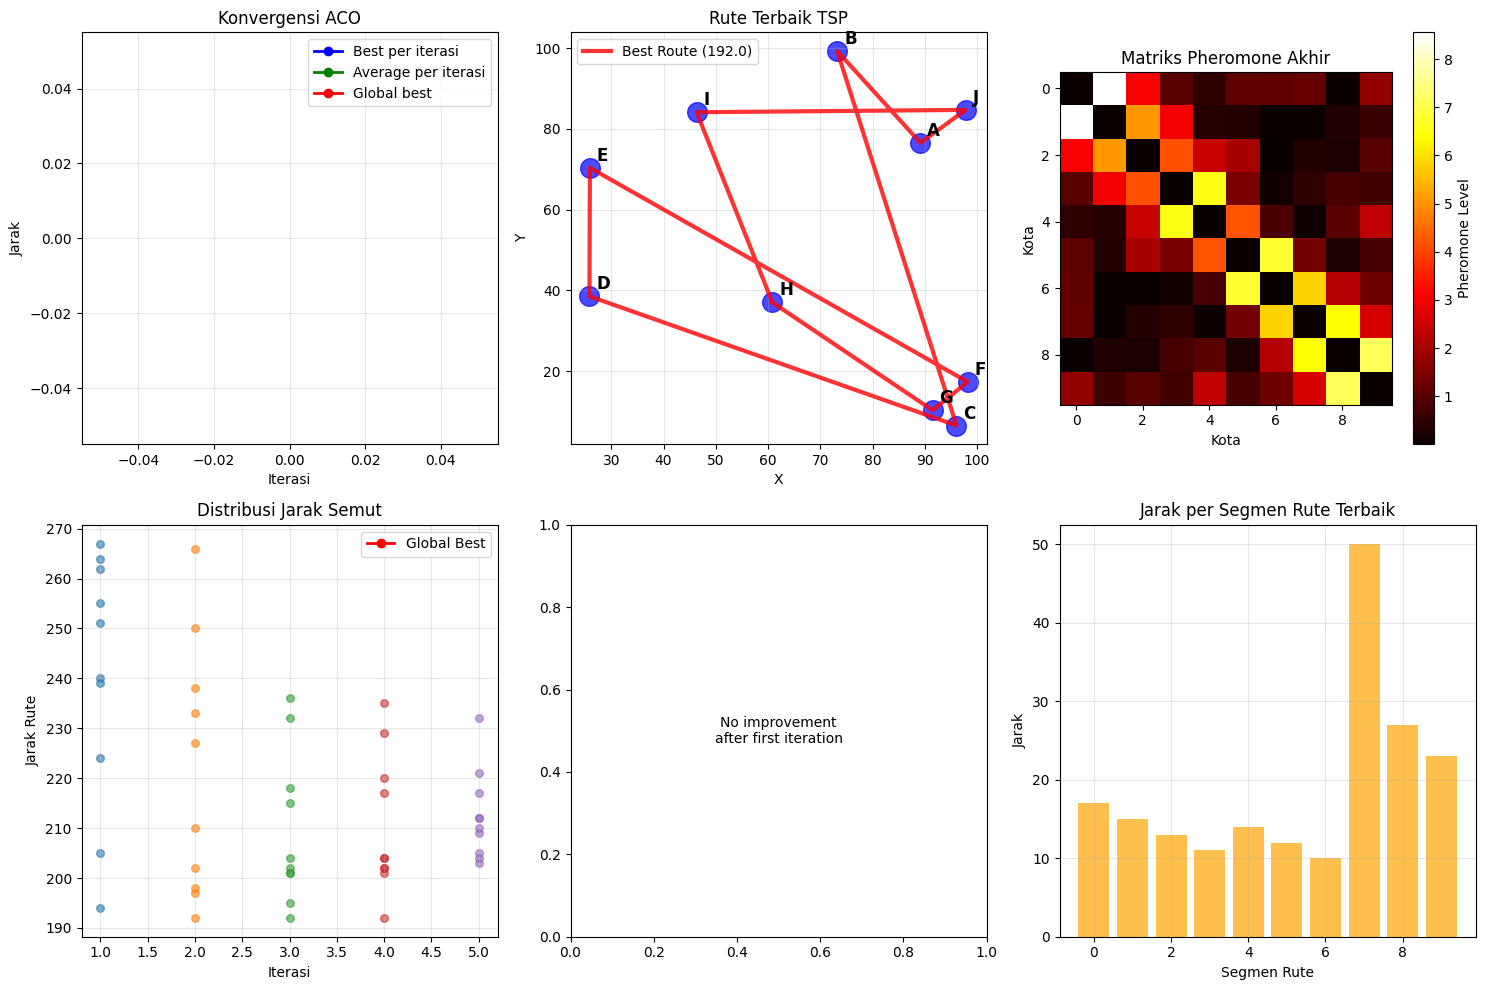

Visualisasi selesai!


In [43]:
# Cell 6: Visualisasi Hasil ACO
# Removing numpy dependency
import matplotlib.pyplot as plt
import random # Import random for manual city coordinates

print("VISUALISASI HASIL ACO")
print("="*25)

plt.figure(figsize=(15, 10))

# Plot 1: Konvergensi
plt.subplot(2, 3, 1)
plt.plot(iterations, best_distances, 'bo-', label='Best per iterasi', linewidth=2)
plt.plot(iterations, avg_distances, 'go-', label='Average per iterasi', linewidth=2)
plt.plot(iterations, global_bests, 'ro-', label='Global best', linewidth=2)
plt.xlabel('Iterasi')
plt.ylabel('Jarak')
plt.title('Konvergensi ACO')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Koordinat kota (generate random for visualization manually)
# random.seed(42) # Optional: set seed for reproducibility
city_coords = {}
for i, city in enumerate(cities):
    x = random.uniform(0, 100)
    y = random.uniform(0, 100)
    city_coords[i] = (x, y)

plt.subplot(2, 3, 2)
# Plot all cities
for i, city in enumerate(cities):
    x, y = city_coords[i]
    plt.scatter(x, y, s=200, c='blue', alpha=0.7)
    plt.annotate(city, (x, y), xytext=(5, 5), textcoords='offset points',
                fontsize=12, fontweight='bold')

# Plot best route
route_x = []
route_y = []
if best_route:
  for city_idx in best_route:
      x, y = city_coords[city_idx]
      route_x.append(x)
      route_y.append(y)

  # Add back to the starting city
  route_x.append(city_coords[best_route[0]][0])
  route_y.append(city_coords[best_route[0]][1])

  plt.plot(route_x, route_y, 'r-', linewidth=3, alpha=0.8, label=f'Best Route ({best_distance:.1f})')
else:
  plt.text(0.5, 0.5, 'No best route found', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)


plt.xlabel('X')
plt.ylabel('Y')
plt.title('Rute Terbaik TSP')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 3: Pheromone Matrix (Manual plotting or simplified representation)
# Since matplotlib.pyplot.imshow is a common way to visualize matrices,
# and it doesn't inherently require numpy arrays (it can work with lists of lists),
# we can keep this visualization, but ensure the pheromone matrix is a list of lists.
plt.subplot(2, 3, 3)
if aco and hasattr(aco, 'pheromone'):
  plt.imshow(aco.pheromone, cmap='hot', interpolation='nearest')
  plt.colorbar(label='Pheromone Level')
  plt.title('Matriks Pheromone Akhir')
  plt.xlabel('Kota')
  plt.ylabel('Kota')
else:
  plt.text(0.5, 0.5, 'Pheromone matrix not available', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)


# Plot 4: Distribution of distances per iteration (Manual)
plt.subplot(2, 3, 4)
for i, h in enumerate(aco.history):
    distances = h['distances']
    x_pos = [i + 1] * len(distances)
    plt.scatter(x_pos, distances, alpha=0.6, s=30)

plt.plot(iterations, global_bests, 'ro-', linewidth=2, label='Global Best')
plt.xlabel('Iterasi')
plt.ylabel('Jarak Rute')
plt.title('Distribusi Jarak Semut')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 5: Improvement per iteration (Manual)
plt.subplot(2, 3, 5)
improvements = []
if global_bests and len(global_bests) > 1:
  for i in range(1, len(global_bests)):
      imp = global_bests[i-1] - global_bests[i]
      improvements.append(imp)

if improvements:
    # Use iteration numbers for x-axis, starting from 2
    plt.bar(range(2, len(global_bests) + 1), improvements, alpha=0.7, color='green')
    plt.xlabel('Iterasi')
    plt.ylabel('Improvement')
    plt.title('Improvement per Iterasi')
    plt.grid(True, alpha=0.3)
else:
    plt.text(0.5, 0.5, 'No improvement\nafter first iteration',
             ha='center', va='center', transform=plt.gca().transAxes)


# Plot 6: Heatmap of distances in best route (Manual)
plt.subplot(2, 3, 6)
if best_route:
  route_distances = []
  for i in range(len(best_route)):
      from_city = best_route[i]
      to_city = best_route[(i + 1) % len(best_route)]
      route_distances.append(distance_matrix[from_city][to_city])

  plt.bar(range(len(route_distances)), route_distances, alpha=0.7, color='orange')
  plt.xlabel('Segmen Rute')
  plt.ylabel('Jarak')
  plt.title('Jarak per Segmen Rute Terbaik')
  plt.grid(True, alpha=0.3)
else:
  plt.text(0.5, 0.5, 'No best route to visualize', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)


plt.tight_layout()
plt.show()

print("Visualisasi selesai!")

In [44]:
# Cell 7: Analisis Detail Pheromone
# Removing numpy dependency
# import numpy as np # Removed numpy

print("ANALISIS PHEROMONE")
print("="*25)

print("Pheromone matrix akhir:")
print("      ", end="")
for city in cities:
    print(f"{city:8}", end="")
print()

if aco and hasattr(aco, 'pheromone'):
    for i, city in enumerate(cities):
        print(f"{city:4}: ", end="")
        for j in range(num_cities):
            print(f"{aco.pheromone[i][j]:8.3f}", end="")
        print()

    # Analyze edges with highest pheromone
    print(f"\nEdge dengan pheromone tertinggi:")
    edge_pheromones = []
    for i in range(num_cities):
        for j in range(i+1, num_cities): # Avoid duplicates and self-loops
            pheromone_level = aco.pheromone[i][j]
            edge_pheromones.append((cities[i], cities[j], pheromone_level))

    # Sort manually using a list sort and lambda
    edge_pheromones.sort(key=lambda x: x[2], reverse=True)

    print("Edge         Pheromone")
    print("-" * 20)
    for i in range(min(10, len(edge_pheromones))):
        city1, city2, pheromone = edge_pheromones[i]
        print(f"{city1}-{city2:8} {pheromone:8.3f}")

    # Compare with best route
    print(f"\nPheromone pada rute terbaik:")
    route_pheromones = []
    if best_route:
        for i in range(len(best_route)):
            from_city = best_route[i]
            to_city = best_route[(i + 1) % len(best_route)]
            pheromone_level = aco.pheromone[from_city][to_city]
            route_pheromones.append((cities[from_city], cities[to_city], pheromone_level))

        print("Edge         Pheromone")
        print("-" * 20)
        for city1, city2, pheromone in route_pheromones:
            print(f"{city1}-{city2:8} {pheromone:8.3f}")

        # Manual average calculation
        avg_route_pheromone = sum([p[2] for p in route_pheromones]) / len(route_pheromones) if route_pheromones else 0
        print(f"\nRata-rata pheromone rute terbaik: {avg_route_pheromone:.3f}")
    else:
        print("No best route available to analyze pheromone.")

else:
    print("ACO object or pheromone matrix not available.")

ANALISIS PHEROMONE
Pheromone matrix akhir:
      A       B       C       D       E       F       G       H       I       J       
A   :    0.003   8.557   3.032   1.030   0.504   1.101   1.113   1.185   0.003   1.761
B   :    8.557   0.003   5.049   2.997   0.366   0.325   0.027   0.003   0.297   0.664
C   :    3.032   5.049   0.003   4.162   2.430   2.023   0.027   0.328   0.214   1.022
D   :    1.030   2.997   4.162   0.003   6.581   1.428   0.130   0.489   0.781   0.688
E   :    0.504   0.366   2.430   6.581   0.003   4.201   0.835   0.056   1.029   2.285
F   :    1.101   0.325   2.023   1.428   4.201   0.003   6.799   1.372   0.254   0.783
G   :    1.113   0.027   0.027   0.130   0.835   6.799   0.003   5.844   2.187   1.324
H   :    1.185   0.003   0.328   0.489   0.056   1.372   5.844   0.003   6.384   2.624
I   :    0.003   0.297   0.214   0.781   1.029   0.254   2.187   6.384   0.003   7.136
J   :    1.761   0.664   1.022   0.688   2.285   0.783   1.324   2.624   7.136   0.003


In [46]:
import random
import math

# Helper functions (sigmoid, softmax, argmax) and training function (train_jst)
def sigmoid(x):
    """Sigmoid activation function."""
    return 1 / (1 + math.exp(-x))

def softmax(z):
    """Softmax activation function."""
    exp_z = [math.exp(i) for i in z]
    return [i / sum(exp_z) for i in exp_z]

def argmax(arr):
    """Returns the index of the maximum value in a list."""
    return arr.index(max(arr))

def train_jst(X, y_onehot, learning_rate=0.1, epochs=100):
    """
    Melatih Jaringan Syaraf Tiruan sederhana (dengan satu hidden layer)

    Parameters:
    X: Data input (list of lists)
    y_onehot: Label target dalam format one-hot encoding (list of lists)
    learning_rate: Tingkat pembelajaran
    epochs: Jumlah iterasi pelatihan
    """
    print(f"\nMemulai training JST ({epochs} epochs)...")

    n_input = len(X[0])
    n_hidden = 5 # Jumlah neuron di hidden layer (bisa disesuaikan)
    n_output = len(y_onehot[0])

    # Inisialisasi bobot dan bias secara random
    W1 = [[random.uniform(-0.5, 0.5) for _ in range(n_hidden)] for _ in range(n_input)]
    b1 = [random.uniform(-0.5, 0.5) for _ in range(n_hidden)]
    W2 = [[random.uniform(-0.5, 0.5) for _ in range(n_output)] for _ in range(n_hidden)]
    b2 = [random.uniform(-0.5, 0.5) for _ in range(n_output)]

    for epoch in range(epochs):
        total_loss = 0
        for i in range(len(X)):
            x = X[i]
            y_true = y_onehot[i]

            # Forward propagation
            z1 = [sum(x[j] * W1[j][k] for j in range(n_input)) + b1[k] for k in range(n_hidden)]
            a1 = [sigmoid(z) for z in z1]

            z2 = [sum(a1[j] * W2[j][k] for j in range(n_hidden)) + b2[k] for k in range(n_output)]
            a2 = softmax(z2)

            # Calculate loss (Cross-entropy)
            # Avoid log(0)
            loss = -sum([y_true[k] * math.log(max(a2[k], 1e-10)) for k in range(n_output)])
            total_loss += loss

            # Backward propagation
            # Output layer error
            error_output = [a2[k] - y_true[k] for k in range(n_output)]

            # Hidden layer error
            error_hidden = [0.0] * n_hidden
            for j in range(n_hidden):
                for k in range(n_output):
                    error_hidden[j] += error_output[k] * W2[j][k]
                # Derivative of sigmoid
                error_hidden[j] *= a1[j] * (1 - a1[j])

            # Update weights and biases
            for k in range(n_output):
                for j in range(n_hidden):
                    W2[j][k] -= learning_rate * error_output[k] * a1[j]
                b2[k] -= learning_rate * error_output[k]

            for j in range(n_hidden):
                for i_input in range(n_input):
                    W1[i_input][j] -= learning_rate * error_hidden[j] * x[i_input]
                b1[j] -= learning_rate * error_hidden[j]

        # Print loss per epoch
        avg_loss = total_loss / len(X)
        if (epoch + 1) % 50 == 0 or epoch == 0 or epoch == epochs -1:
           print(f"  Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.4f}")

    print("Training selesai!")
    return W1, b1, W2, b2